## Abstract/Objetivo
<small> Conocer la variación de precios de los distintos productos publicados por la Unidad de Defensa del Consumidor (LPP) de Uruguay. Comparar esta información con el IPC general publicado por el Instituto de Estadística (INE) a modo de verificar si hay un desvio o no entre ambos indicadores. Conocer ésto implica tener un indicio fuerte de si el IPC es el reflejo del incremento de precios percibido por el público en general.
</small>

#### Contexto Comercial
<small>
Siempre ha existido una percepción del público que la inflación se da en forma desigual en el país, y particularmente en la capital Montevideo que concentra la mitad de la población. Desde el año 2017 la Unidad de Defensa del Consumidor, dependiente del Ministerio de Economía publica mensualmente un boletín con precios diarios proporcionado por comercios que hacen parte de las mayores cadenas de supermercados y otros comercios minoristas.
</small>

#### Problema Comercial
<small>
Anualmente la AGESIC (Agencia del Gobierno Electrónico y Sociedad de la Infomación y de Conocimiento) a través de su portal (https://catalogodatos.gub.uy) pública esta lista de precios. Esta información es remitida diariamente por unos 400 a 600 comercios y comprende unos 300 productos. Esto hace que a la fecha haya más de 100 millones de registros en los 5 años que lleva publicado dicha información. En un contexto de inflación relativamente estable y debido al volúmen de dicha información he decidido que no es necesario trabajar con toda la data ya que la variación diaria de los precios no es relevante, con lo que se plantea un trabajo con óptica mensual/anual. <br>
A la vez se intentará enriquecer el análisis con el cruce de datos proveniente de otros organismos, como es la Encuesta Continua de Hogares (ECH) publicada mensualmente por el mismo INE. Se agrega el diccionario de datos de la encuesta (PDF), que es verdaderamente importante, hay muchas variables que se pueden usar pero en este primer momento usaré sólo algunas. <br>
Como punto fuerte hay que mencionar que el análisis permitirá al usuario incluir variables de su interés a efectos de comparar la variación de precios de comercios e IPC. Variables tan disímiles como precio de combustibles, cotización del dólar, población activa, etc., es decir, teóricamente cualquier variable. Esto con incluir los valores "a mano" en un archivo excel de "productos" especiales.
<br>
<br>
<br>
A lo largo del análisis se muestra donde se responde a las preguntas o donde está el indicio de respuesta, ya que se puede profundizar bastante más en cada punto.
</small>

#### Preguntas e hipótesis generales
<small>
1: Pregunta: Hay una percepción general de que los precios suben más que la inflación oficial, ¿ ésto es así ?
<br>
   Hipótesis: la inflación general está por debajo de la suba de precios en los comercios
<br>
2: Pregunta: La suba de los precios se da igual en todos las ciudades y barrios ?
<br>
   Hipótesis: La suba se da desigual, más alto en los barrios de ciudades de mayor poder adquisitivo
<br>
3: Pregunta: Las cadenas de comercios suben los precios por igual
<br>
   Hipótesis: Algunas suben bastante más que la otras
<br>
4: Pregunta: Hay alguna variable macroeconómica que refleje la suba de precios
<br>
   Hipótesis: Puede existir, difícil conocerla, si esto es así por lo menos conocer cierta correlación entre ellas.
<br>
5: Pregunta: Qué productos o tipos de productos suben más de precio
<br>
   Hipótesis: Alimentos, pero saber cuáles y en qué medida
<br>
6: Pregunta: Dado un contexto inflacionario estimado, es posible proyectar precios para productos o grupo de productos
<br>
   Hipótesis: Es posible, si bien la respuesta vendrá dada por las próximas publicaciones
</small>

## Carga Inicial: A continuación se procede a cargar los módulos y variables generales

#### Módulos y variables generales
<small>
Importar módulos necesarios y configurar variables iniciales
</small>

In [94]:
### Algunos módulos necesarios (otros se importarán más adelante)
import pandas as pd
import numpy as np
import calendar
import datetime
import math

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats   # Para gráfica de destribución

import gc # librería para concatenar archivos .csv

from sklearn import linear_model

#### Variables y Parámetros Generales

In [95]:
### Parámetros generales

### Meses del año a analizar: del 1 al 12
### v_MesAnalisis = 12
v_MesesContexto = [12]
v_AñosContexto = [2017,2018,2019,2020,2021,2022]

### Variación intrames; 12 = anual (recomendado)
v_Meses_VarQ = 12

## Leer importante:
### Debido a la gran data en estos archivos, en modo desarrollo grabo los pasos intermedios a fin de no tener que levantar siempre toda la data y ahorrar tiempo de proceso (por ahora son 80 millones de líneas)
#### C=completa, levanta todos los dataframes, 
#### R0=Levanta archivo general de Precios (bruto, consolidado),
#### R1=R0 pero le elimina columnas innecesarias
#### R2=(recomendado), lo mismo que R1 pero con otro pre-proceso 
#### E1=(aún no disponible) Especifica en este caso aclarar Producto y Establecimiento

### No modificar éstas variables (por ahora)
v_TipoEjecuta = "R2" # Filtrado por precios último día de cada mes
v_Graba = False      # si graba o no nuevo archivo intermedio

### Solo para Ejecución 'E'
v_EjecProducto = []   # Si la lista es vacía no filtra, usa todos
v_EjecEstab = []     # Si la lista es vacía no filtra, usa todos
v_EjecAño = 2022

### Ruta de los datos
v_ruta = "D:\Serprivado\Proyectos\DataScience_CoderHouse_datos"
#v_ruta = "C:\\Users\slotito\\Documents\\Proyecto_CoderHouse_DataScience" # duplico barra por \U
#v_ruta = r"C:\Users\slotito\Documents\Proyecto_CoderHouse_DataScience" # duplico barra por \U
v_rutaWeb = "https://1drv.ms/f/s!At2vUQQP7kbbgowskcf91dyujSkboQ?e=Zji70F"  # no usada

↑↑↑ <small> En la linea de arriba cambiar el parámetre 'v_ruta' por una ruta local
</small>

In [96]:
### Variables Auxiliares

### A efectos de crear un código auxiliar para año/mes
v_AnoMes_Filtro = [x * 100 + y for x in v_AñosContexto for y in v_MesesContexto]
v_AnoMes_FiltroR = v_AnoMes_Filtro[1:]  # Excluyo el primer año por valores nulos y "1"

v_AnoMes_Ultimo = [max(v_AnoMes_FiltroR)]  # Para analizar el periodo completo

### Me quedo con el último día de cada mes a fin de reducir el dataset principal
v_ultimo_DiaMes = []
for v_Año in v_AñosContexto:
    for v_Mes in range(1, 13):
        v_ultimo_Dia = calendar.monthrange(v_Año, v_Mes)[1]
        v_FechaTmp = datetime.date(v_Año, v_Mes, v_ultimo_Dia)
        v_ultimo_DiaMes.append(v_FechaTmp)

del v_ultimo_Dia

## Contexto inflacionario en el periodo analizado
<small>
Archivo IPC para conocer contexto general de Inflación
</small> 

<function matplotlib.pyplot.show(close=None, block=None)>

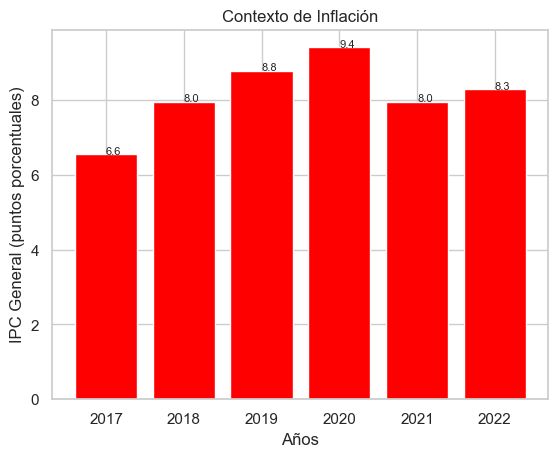

In [97]:
### Levanta archivo general de IPC
if v_TipoEjecuta != "X":    # !='X' : Siempre se ejecuta
    ### Importación Indice General de Precios
    df_ipcGral = pd.read_excel(v_ruta + '/IPC_gral_y_variaciones_base_2022.xls', sheet_name='IPC_Cua 1', header=0, engine='xlrd' )

    ### Elimino las primeras filas del encabezado, algunas columnas innecesarias y nombro las columnas del dataframe
    df_ipcGral = df_ipcGral.drop(df_ipcGral.index[0:8])
    df_ipcGral.columns = [ 'Fecha', 'Indice', 'Ind_VarMes', 'Ind_VarAño', 'Ind_Var12','eliminar2','eliminar3', 'eliminar4']

    tmp_col_elimina = ['eliminar2', 'eliminar3', 'eliminar4']
    df_ipcGral = df_ipcGral.drop(tmp_col_elimina, axis=1)
    df_ipcGral = df_ipcGral.dropna(subset=['Indice'])

    df_ipcGral['Fecha'] = pd.to_datetime(df_ipcGral['Fecha'])

    ## Creo un indice auxiliar 'Año/Mes' a fin de matchear con otros dataframes
    df_ipcGral['Cod_AnoMes'] = (df_ipcGral['Fecha'].dt.year * 100) + df_ipcGral['Fecha'].dt.month
    df_ipcGral['Año'] = df_ipcGral['Fecha'].dt.year
    df_ipcGral['Mes'] = df_ipcGral['Fecha'].dt.month

    ### Convierto algunos tipos de datos para asegurarme que tengan el tipo correcto
    df_ipcGral['Indice'] = df_ipcGral['Indice'].astype(float)
    df_ipcGral['Año'] = df_ipcGral['Año'].astype(int)
    df_ipcGral['Mes'] = df_ipcGral['Mes'].astype(int)
    df_ipcGral['Ind_VarMes'] = df_ipcGral['Ind_VarMes'].astype(float)
    df_ipcGral['Ind_VarAño'] = df_ipcGral['Ind_VarAño'].astype(float)
    df_ipcGral['Ind_Var12'] = df_ipcGral['Ind_Var12'].astype(float)

    ### Elimino columna innecesaria, ya tengo el índice Año/Mes que usaré
    df_ipcGral = df_ipcGral.drop(['Fecha', 'Ind_VarAño'], axis=1)

    ### Reordeno el DF
    df_ipcGral = df_ipcGral.reindex(columns=['Cod_AnoMes' , 'Año', 'Mes', 'Indice', 'Ind_VarMes', 'Ind_Var12'])

### Obtengo DF resumido a fin de incorporar columna
df_ipcGral_red = df_ipcGral[['Cod_AnoMes', 'Ind_Var12']]

###df_ipcGralReducido = df_ipcGral[df_ipcGral['Mes'].isin(v_MesesContexto) & df_ipcGral['Año'].isin(v_AñosContexto)]
df_ipcGralReducido = df_ipcGral[df_ipcGral['Cod_AnoMes'].isin(v_AnoMes_Filtro)]

plt.bar(df_ipcGralReducido['Año'], df_ipcGralReducido['Ind_Var12'], label='Inflación', color='red')

plt.xlabel('Años')
plt.ylabel('IPC General (puntos porcentuales)')
plt.title('Contexto de Inflación')
for i in range(len(df_ipcGralReducido)):
    plt.text(df_ipcGralReducido['Año'].iloc[i], df_ipcGralReducido['Ind_Var12'].iloc[i], round(df_ipcGralReducido['Ind_Var12'].iloc[i],1), fontsize=8)

plt.show


↑↑↑ <small>Insight 1: (gráfico anterior)
Visión rápida al operador del contexto inflacionario del período analizado. <br>
Para el período analizado ve nota buena estabilidad para el periodo analizado. Con ésto tenemos un contexto esperable (o no) para los productos analizados.
</small>

#### Archivos Auxiliares estructura IPC
<small>
Levanta archivos auxiliares con la finalidad de enriquecer el análisis. Estos DF contendrán la estructura del IPC por Grupo, Clase y subclase de producto.
</small>

In [98]:
### Levanta archivo auxiliar de IPC con clasificacion de productos
    
df_IPC_Divisiones = pd.read_excel(v_ruta + '/Estructura_IPC.xlsx', sheet_name='Divisiones', header=0, engine='openpyxl', dtype={"Division": str})
df_IPC_Divisiones = df_IPC_Divisiones.loc[:, ["Division", "Denominación Division"]]

df_IPC_Grupo = pd.read_excel(v_ruta + '/Estructura_IPC.xlsx', sheet_name='Grupo', header=0, engine='openpyxl', dtype={"Grupo": str})
df_IPC_Grupo = df_IPC_Grupo.loc[:, ["Grupo", "Denominación Grupo"]]
df_IPC_Grupo["Grupo"] = df_IPC_Grupo["Grupo"].astype(str).str[:3]

df_IPC_Clases = pd.read_excel(v_ruta + '/Estructura_IPC.xlsx', sheet_name='Clases', header=0, engine='openpyxl' , dtype={"Clase": str})
df_IPC_Clases = df_IPC_Clases.loc[:, ["Clase", "Denominación Clase"]]
df_IPC_Clases["Clase"] = df_IPC_Clases["Clase"].astype(str).str[:4]

### Importación Indice General de Precios
df_Mapeo_EstabSecc = pd.read_excel(v_ruta + '/Mapeo_Estab-Secciones.xlsx', sheet_name='Hoja1', header=0, engine='openpyxl' )


#### Archivo de "productos especiales"
<small>
Archivo de "productos" especiales. Permite agregar al análisis cualquier variable macro a fin de compararla con la lista de precios publicada
</small>

In [99]:
### Levanta archivo de PRECIOS de productos ESPECIALES

rango_fechas = pd.date_range(start='01/01/2017', end='31/12/2025', freq='D').strftime('%d/%m/%Y')
df_fechas = pd.DataFrame({'Fecha': rango_fechas})
df_fechas['Fecha'] = pd.to_datetime(df_fechas['Fecha'], format='%d/%m/%Y')
df_fechas['Cod_AnoMes'] = (df_fechas['Fecha'].dt.year * 100) + df_fechas['Fecha'].dt.month
df_fechas = df_fechas[df_fechas['Cod_AnoMes'].isin(v_AnoMes_Filtro)]
df_fechas = df_fechas[df_fechas['Fecha'].isin(v_ultimo_DiaMes)]

if v_TipoEjecuta != "X":    # !='X' : Siempre se ejecuta
    ### Importación Indice General de Precios
    df_ListadoEsp = pd.read_excel(v_ruta + '/Listado_Productos_Especiales.xlsx', sheet_name='Listado', header=0, engine='openpyxl' )
df_ListadoEsp['Fecha'] = pd.to_datetime(df_ListadoEsp['Fecha'], format='%d/%m/%Y')
df_ListadoEsp['Cod_AnoMes'] = (df_ListadoEsp['Fecha'].dt.year * 100) + df_ListadoEsp['Fecha'].dt.month
df_ListadoEsp = df_ListadoEsp[df_ListadoEsp['Cod_AnoMes'].isin(v_AnoMes_Filtro)]
df_ListadoEsp = df_ListadoEsp[df_ListadoEsp['Fecha'].isin(v_ultimo_DiaMes)]
df_ListadoEsp['Año'] = df_ListadoEsp['Fecha'].dt.year
df_ListadoEsp['Mes'] = df_ListadoEsp['Fecha'].dt.month

# Fusionar los dataframes por "Fecha"
df_Aux1 = pd.merge(df_fechas, df_ListadoEsp, on='Cod_AnoMes', how='left')

# Completar los valores faltantes de "Precio" con el valor anterior
df_Aux1['Precio'] = df_Aux1['Precio'].fillna(method='ffill')

cols = ['id_Estab', 'id_Producto', 'Año', 'Mes', 'Precio', 'Cod_AnoMes']  # Selección y orden de las columnas
df_PreciosAgrupaEsp = df_Aux1.loc[:, cols]
df_PreciosAgrupaEsp['PrEsp'] = True
v_PreciosAgrupaEsp = df_PreciosAgrupaEsp.shape[0]

del df_Aux1 # limpia DF

#### Archivos de Establecimientos y Productos
<small>
Levanta archivos de Establecimientos y Productos.
Al DF inicial de Establecimientos se lo enriquece con información geográfica que permitirá segmentarlo y cruzar con información de la Encuesta Continua de Hogares (ECH) publicado por el INE.
Al DF inical de Productos se lo enriquece con información de productos "especiales", variables de interés al operador y las transforma para ser comparables con la LPP/ODC
</small>

In [100]:
### Levanta archivos de códigos de Productos y Establecimientos
df_Productos_Ppal = pd.read_csv(v_ruta +'/productos.csv', sep=';', encoding='utf-8')
df_Productos_Ppal.rename(columns={'id': 'id_Producto'}, inplace=True)
### De origen algunas palabras están con ese símbolo, no es cuestión de cambiarle el intérprete
v_reemplazo ={'ma�z': 'maíz', 'Az�car': 'Azúcar' , 'Caf�': 'Café', 'Champ�': 'Champu', 'instant�neo': 'inst.', '�guila': 'Águila', 'lim�n': 'limón', '': 'maíz', 'Calabac�n': 'Calabacín', 'Colol�':  'Cololó', 'jab�n': 'jabón', 'm�quina': 'máquina', 'jab�n': 'jabón', 'Pa�ales': 'Pañales', 'com�n': 'común', 'jam�n': 'jamón', 'Peque�o': 'Pequeño', 'j�piter': 'júpiter', 'R�o': 'Río', 'jab�n': 'jabón', 'jam�o': 'jamón', '�ptimo': 'Óptimo'}
df_Productos_Ppal = df_Productos_Ppal.replace(v_reemplazo, regex=True)

df_Productos_Esp = pd.read_excel(v_ruta + '/Listado_Productos_Especiales.xlsx', sheet_name='Productos', header=0, engine='openpyxl' )
df_Productos_Esp.rename(columns={'id': 'id_Producto'}, inplace=True)

df_Productos = pd.concat([df_Productos_Ppal, df_Productos_Esp], ignore_index=True)

### Mapeo de productos
dtypes = {'Division': str, 'Grupo': str, 'Clase': str, 'Subclase': str, 'Producto': str}
df_mapeoProductos = pd.read_excel(v_ruta + '/Productos_Clasificados.xlsx', sheet_name='productos', header=0, engine='openpyxl', dtype=dtypes)
tmp_col_elimina = ['producto', 'marca', 'especificacion', 'nombre']
df_mapeoProductos = df_mapeoProductos.drop(tmp_col_elimina, axis=1)
df_mapeoProductos["Division"] = df_mapeoProductos["Division"].astype(str).str[:2]

df_Productos_1 = pd.merge(df_Productos, df_mapeoProductos, on='id_Producto', how='left')
df_Productos_2 = pd.merge(df_Productos_1, df_IPC_Divisiones, on='Division', how='left')
df_Productos_3 = pd.merge(df_Productos_2, df_IPC_Grupo, on='Grupo', how='left')
df_Productos = pd.merge(df_Productos_3, df_IPC_Clases, on='Clase', how='left')
del df_Productos_1
del df_Productos_2
del df_Productos_3

df_Establecimientos_Ppal = pd.read_csv(v_ruta + '/establecimiento.csv', sep=';', decimal=',')
df_Establecimientos_Ppal.rename(columns={'id_establecimientos': 'id_Estab'}, inplace=True)

df_EstablecimientosEsp = pd.read_excel(v_ruta + '/Listado_Productos_Especiales.xlsx', sheet_name='Establecimientos', header=0, engine='openpyxl' )
df_EstablecimientosEsp.rename(columns={'id_establecimientos': 'id_Estab'}, inplace=True)

df_Establecimientos = pd.concat([df_Establecimientos_Ppal, df_EstablecimientosEsp], ignore_index=True)
v_reemplazo ={'G�ant': 'Geant', 'Mayorista': 'My.', 'Cord�n': 'Cordón', 'Uni�n': 'Unión', 'Malv�n': 'Malvín'}
df_Establecimientos = df_Establecimientos.replace(v_reemplazo, regex=True)

df_Establecimientos['lat'] = df_Establecimientos['lat'].str.replace(',', '.')
df_Establecimientos['long'] = df_Establecimientos['long'].str.replace(',', '.')
df_Establecimientos['lat'] = pd.to_numeric(df_Establecimientos['lat'], errors='coerce')
df_Establecimientos['long'] = pd.to_numeric(df_Establecimientos['long'], errors='coerce')
df_Establecimientos['lat_rad'] = np.radians(df_Establecimientos['lat'])
df_Establecimientos['lon_rad'] = np.radians(df_Establecimientos['long'])
df_Establecimientos.loc[df_Establecimientos['lat'] > 0, 'lat'] = df_Establecimientos.loc[df_Establecimientos['lat'] > 0, 'lat'] * -1
df_Establecimientos.loc[df_Establecimientos['long'] > 0, 'long'] = df_Establecimientos.loc[df_Establecimientos['long'] > 0, 'long'] * -1

df_Establecimientos = pd.merge(df_Establecimientos, df_Mapeo_EstabSecc, on='id_Estab', how='left')


#### Archivo de Precios
<small> Son los archivos principales de análisis
</small>

In [101]:
## Consolida ó levanta listados de precios
if v_TipoEjecuta == "C":
    
    df_Precios2022 = pd.read_csv(v_ruta + '/precios_2022.csv', parse_dates=['Fecha'],  header=None, names= ['Id_PrDiario', 'Fecha', 'Fecha_Ant', 'Oferta', 'Pr_desuso', 'Precio', 'Anulada1', 'Anulada2', 'id_Estab', 'id_Ferias', 'id_Producto' ])

    df_Precios2021 = pd.read_csv(v_ruta + '/precios_2021.csv', parse_dates=['Fecha'], header=None, names= ['Id_PrDiario', 'Fecha', 'Fecha_Ant', 'Oferta', 'Pr_desuso', 'Precio', 'Anulada1', 'Anulada2', 'id_Estab', 'id_Ferias', 'id_Producto' ])

    df_Precios_1 = pd.concat([df_Precios2022, df_Precios2021])

    ### elimino dataframes innecesarios y fuerzo limpieza
    del df_Precios2021
    del df_Precios2022
    ### gc.collect

    ### Vuelvo a cargar (debido al tamaño de los archivos lo hago por partes)
    df_Precios2020 = pd.read_csv(v_ruta + '/precios_2020.csv', parse_dates=['Fecha'], header=None, names= ['Id_PrDiario', 'Fecha', 'Fecha_Ant', 'Oferta', 'Pr_desuso', 'Precio', 'Anulada1', 'Anulada2', 'id_Estab', 'id_Ferias', 'id_Producto' ])

    df_Precios2019 = pd.read_csv(v_ruta + '/precios_2019.csv', parse_dates=['Fecha'], header=None, names= ['Id_PrDiario', 'Fecha', 'Fecha_Ant', 'Oferta', 'Pr_desuso', 'Precio', 'Anulada1', 'Anulada2', 'id_Estab', 'id_Ferias', 'id_Producto' ])

    df_Precios2018 = pd.read_csv(v_ruta + '/precios_2018.csv', parse_dates=['Fecha'], header=None, names= ['Id_PrDiario', 'Fecha', 'Fecha_Ant', 'Oferta', 'Pr_desuso', 'Precio', 'Anulada1', 'Anulada2', 'id_Estab', 'id_Ferias', 'id_Producto' ])

    df_Precios = pd.concat([df_Precios_1, df_Precios2020, df_Precios2019, df_Precios2018])
    ### elimino dataframes innecesarios y fuerzo limpieza
    del df_Precios_1
    del df_Precios2020
    del df_Precios2019
    del df_Precios2018
    ###gc.collect

    if v_Graba:
        ### Guardo la ejecución más pesada para levantarla posteriormente sin procesar todo
        df_Precios.to_csv(v_ruta + '/Arch_Precios_Paso0.csv', index=False)    

In [102]:
## Levanta el archivo de precios consolidado
if v_TipoEjecuta == "R0":
    df_Precios = pd.read_csv(v_ruta + '/Arch_Precios_Paso0.csv')
    v_TipoEjecuta = "C"

In [103]:
### Prepara archivo de Precios
if v_TipoEjecuta == "C":
    ### Elimina columnas que no se van a usar
    tmp_col_elimina = ['Anulada1', 'Anulada2','id_Ferias','Pr_desuso','Fecha_Ant','Oferta','Id_PrDiario']
    df_PreciosAgrupaPpal = df_Precios.drop(tmp_col_elimina, axis=1, inplace=False)
    del df_Precios

    if v_Graba: # _Paso1: _Paso0 con reducción de columnas
        df_PreciosAgrupaPpal.to_csv(v_ruta + '/Arch_Precios_Paso1.csv', index=False)

if v_TipoEjecuta == "R1": # R1=Resumido1, levanta archivo PRECIOS_Paso1
    df_PreciosAgrupaPpal = pd.read_csv(v_ruta + '/Arch_Precios_Paso1.csv')

    ### Columnas adicionales para mejor visualización
    df_PreciosAgrupaPpal['Fecha'] = pd.to_datetime(df_PreciosAgrupaPpal['Fecha'])
    df_PreciosAgrupaPpal['Año'] = df_PreciosAgrupaPpal['Fecha'].dt.year
    df_PreciosAgrupaPpal['Mes'] = df_PreciosAgrupaPpal['Fecha'].dt.month

    ### Filtro y me quedo con el último día de cada mes
    df_PreciosAgrupaPpal['Fecha'] = df_PreciosAgrupaPpal['Fecha'].dt.date
    df_PreciosAgrupaPpal = df_PreciosAgrupaPpal[df_PreciosAgrupaPpal['Fecha'].isin(v_ultimo_DiaMes)]

    ### Filtro y me quedo solamente con los meses del análisis
    df_PreciosAgrupaPpal = df_PreciosAgrupaPpal[df_PreciosAgrupaPpal['Cod_AnoMes'].isin(v_AnoMes_Filtro)]
    df_PreciosAgrupaPpal.drop(columns=['Fecha'],axis=1, inplace=True)

    if v_Graba:    ### _Paso2: _Paso1 sólo últ día mes y agrega 'Año' y 'Mes'
        df_PreciosAgrupaPpal.to_csv(v_ruta + '/Arch_Precios_Paso2.csv', index=False)

if v_TipoEjecuta == "R2":
    df_PreciosAgrupaPpal_1 = pd.read_csv(v_ruta + '/Arch_Precios_Paso2.csv')

    ### Hago la ficción de que los precios al 01/01/2018 = 31/12/2017 a fin de aprovechar el año 2018
    df_Precios2017_fic = pd.read_csv(v_ruta + '/precios_2017_fic.csv', parse_dates=['Fecha'], header=None, names= ['Id_PrDiario', 'Fecha', 'Fecha_Ant', 'Oferta', 'Pr_desuso', 'Precio', 'Anulada1', 'Anulada2', 'id_Estab', 'id_Ferias', 'id_Producto' ])

    df_Precios2017_fic['Fecha'] =  pd.to_datetime(df_Precios2017_fic['Fecha'], format='%Y/%m/%d')
    df_Precios2017_fic['Año'] = df_Precios2017_fic['Fecha'].dt.year
    df_Precios2017_fic['Mes'] = df_Precios2017_fic['Fecha'].dt.month

    df_PreciosAgrupa_fic = df_Precios2017_fic.groupby(['id_Estab', 'id_Producto', 'Año', 'Mes'])['Precio'].mean().reset_index()
    
    df_PreciosAgrupaPpal_1 = df_PreciosAgrupaPpal_1.reindex(columns=[ 'id_Estab', 'id_Producto', 'Año', 'Mes' ,'Precio'])

    df_PreciosAgrupaPpal = pd.concat([df_PreciosAgrupaPpal_1, df_PreciosAgrupa_fic])
    del df_PreciosAgrupaPpal_1
    del df_Precios2017_fic

if v_TipoEjecuta == "R3":
    df_PreciosAgrupaPpal = pd.read_csv(v_ruta + '/Arch_Precios_Paso3.csv')

### Se detectaron casos aislados de comercios que para un 'mismo' producto indicaron más de un precio
df_PreciosAgrupaPpal = df_PreciosAgrupaPpal.groupby(['id_Estab', 'id_Producto', 'Año', 'Mes'])['Precio'].mean().reset_index()

### Creo columna auxiliar
df_PreciosAgrupaPpal['Cod_AnoMes'] = (df_PreciosAgrupaPpal['Año'] * 100) + df_PreciosAgrupaPpal['Mes']

### Me aseguro que estos campos tengan el tipo de dato correcto
df_PreciosAgrupaPpal.loc[:, 'id_Estab'] = df_PreciosAgrupaPpal['id_Estab'].astype('int16')
df_PreciosAgrupaPpal.loc[:, 'id_Producto'] = df_PreciosAgrupaPpal['id_Producto'].astype('int16')

df_PreciosAgrupaPpal['PrEsp'] = False  # Productos publicados

### Agrega productos especiales si existen
if v_PreciosAgrupaEsp > 0:
    df_PreciosAgrupa = pd.concat([df_PreciosAgrupaPpal, df_PreciosAgrupaEsp])
else:
    df_PreciosAgrupa = df_PreciosAgrupaPpal

del df_PreciosAgrupaPpal  # auxiliar ya no se utilizará
del df_PreciosAgrupa_fic
del df_PreciosAgrupaEsp

## EDA: Conociendo dimensión de los DF generados
<small>
Contexto: cantidad de productos y comercios relevados
</small>

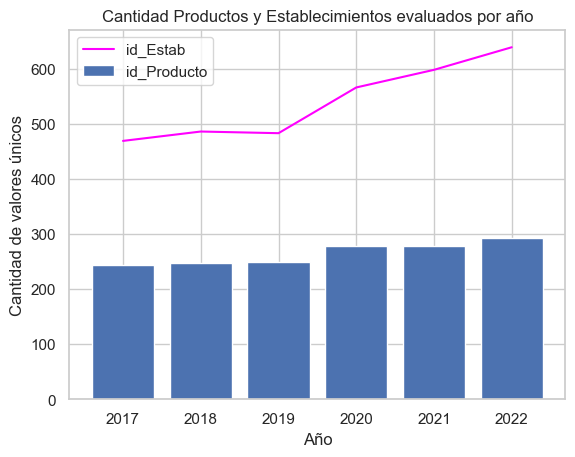

In [104]:
# Calcular la cantidad de id_Producto únicos por año
productos_unicos_por_año = df_PreciosAgrupa.groupby('Año')['id_Producto'].nunique()

# Calcular la cantidad de id_Estab únicos por año
estab_unicos_por_año = df_PreciosAgrupa.groupby('Año')['id_Estab'].nunique()

# Graficar los resultados
plt.bar(productos_unicos_por_año.index, productos_unicos_por_año.values, label='id_Producto')
plt.plot(estab_unicos_por_año.index, estab_unicos_por_año.values, label='id_Estab', color='magenta')
plt.xlabel('Año')
plt.ylabel('Cantidad de valores únicos')
plt.title('Cantidad Productos y Establecimientos evaluados por año')
plt.legend()
plt.show()

In [105]:
v_cant_Reg = df_PreciosAgrupa.shape[0]
print("Número de Registros:", v_cant_Reg)
v_Cant_Prod = df_PreciosAgrupa['id_Producto'].nunique()
print("Cantidad de Productos':", v_Cant_Prod)
v_Cant_Estab = df_PreciosAgrupa['id_Estab'].nunique()
print("Cantidad de Establecimientos':", v_Cant_Estab)

Número de Registros: 3030848
Cantidad de Productos': 294
Cantidad de Establecimientos': 674


<small>Principales DF:
<br>
df_PreciosAgrupa (0): DF Base
<br> 
df_ProductosFiltrado (1), de (0) con filtros Fecha y Producto/Estab si existe
<br> 
df_PreciosAgrupaP (2), de (1): merge con IPC y cálculo de índices
<br>
df_PreciosAgrupaP2 (3), de (2): agrega "productos especiales"
</small>

## Análisis de PRODUCTOS (sin evaluar Establecimientos)

<small>(Respuesta a Pregunta 1)</small>

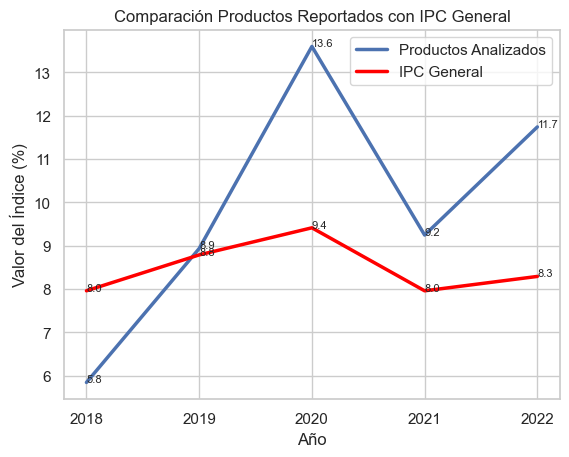

In [106]:
### Análisis de Productos, excluye 'Establecimiento'
if v_TipoEjecuta != "X":

    df_ProductosFiltrado = df_PreciosAgrupa[(df_PreciosAgrupa['Cod_AnoMes'].isin(v_AnoMes_Filtro))]
    if len(v_EjecProducto) > 0:
        df_ProductosFiltrado = df_ProductosFiltrado[df_ProductosFiltrado['id_Producto'].isin(v_EjecProducto)]

    ### Cálculo de variaciones por producto y Año/Mes sin importar )el estab.
    df_ProductosFiltrado = df_ProductosFiltrado.groupby(['id_Producto', 'Año', 'Mes','Cod_AnoMes', 'PrEsp'])['Precio'].mean().reset_index()
    
    ### Variación interperiodo (puede ser 1, 2, 3 ...)
    df_ProductosFiltrado['Pre_Var'] = df_ProductosFiltrado.groupby(['id_Producto'])['Precio'].pct_change(periods=1) * 100

    df_ProductosFiltrado['Pre_Var'] = df_ProductosFiltrado['Pre_Var'].apply(lambda x: (x / 100) + 1)  ### Convierto en % la variable

    ### Crea DF base para trabajo posterior
    df_PreciosAgrupaP = pd.merge(df_ProductosFiltrado, df_ipcGral_red, on='Cod_AnoMes')
    df_PreciosAgrupaP['Ind_Var12'] = df_PreciosAgrupaP['Ind_Var12'].apply(lambda x: (x / 100) + 1)  ### Convierto en % la variable

    ### El primer indice lo hago = 1 para ver evolución
    v_Indice1 = v_AnoMes_Filtro[0]   # Guardo el primer año
    df_PreciosAgrupaP.loc[df_PreciosAgrupaP["Cod_AnoMes"] == v_Indice1, "Ind_Var12"] = 1
    df_PreciosAgrupaP.loc[df_PreciosAgrupaP["Cod_AnoMes"] == v_Indice1, "Pre_Var"] = 1

    df_PreciosAgrupaP.sort_values(['id_Producto', 'Cod_AnoMes'], inplace=True)
    df_PreciosAgrupaP['Pre_Var12Acum'] = df_PreciosAgrupaP.groupby(['id_Producto'])['Pre_Var'].cumprod()
    df_PreciosAgrupaP['Ind_Var12Acum'] = df_PreciosAgrupaP.groupby(['id_Producto'])['Ind_Var12'].cumprod()   # Indicador acumulado

df_PreciosAgrupaP.replace([np.inf, -np.inf], np.nan, inplace=True) # evita errores al dividir por cero en el dataframe

df_PreciosAgrupaP = pd.merge(df_PreciosAgrupaP, df_Productos, on='id_Producto', how='left')

df_PreciosAgrupaP_Periodo = df_PreciosAgrupaP[df_PreciosAgrupaP['Cod_AnoMes'].isin(v_AnoMes_FiltroR)]
df_PreciosAgrupaP_Periodo = df_PreciosAgrupaP_Periodo.groupby('Año').agg({'Pre_Var': lambda x: (x.mean(skipna=True)-1)*100, 'Ind_Var12': lambda x: (x.mean(skipna=True)-1)*100}).reset_index() # lo paso a % para graficar

df_PreciosAgrupaP_Periodo_G = df_PreciosAgrupaP_Periodo.sort_values('Año')

# Crear el gráfico de líneas
plt.plot(df_PreciosAgrupaP_Periodo_G['Año'], df_PreciosAgrupaP_Periodo_G['Pre_Var'], label='Productos Analizados', linewidth=2.5)
plt.plot(df_PreciosAgrupaP_Periodo_G['Año'], df_PreciosAgrupaP_Periodo_G['Ind_Var12'], label='IPC General', linewidth=2.5, color='red')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Valor del Índice (%)')
plt.title('Comparación Productos Reportados con IPC General')
plt.legend()
plt.xticks(df_PreciosAgrupaP_Periodo_G['Año'])
for i in range(len(df_PreciosAgrupaP_Periodo_G)):
    plt.text(df_PreciosAgrupaP_Periodo_G['Año'].iloc[i], df_PreciosAgrupaP_Periodo_G['Pre_Var'].iloc[i], round(df_PreciosAgrupaP_Periodo_G['Pre_Var'].iloc[i],1), fontsize=8)
    plt.text(df_PreciosAgrupaP_Periodo_G['Año'].iloc[i], df_PreciosAgrupaP_Periodo_G['Ind_Var12'].iloc[i], round(df_PreciosAgrupaP_Periodo_G['Ind_Var12'].iloc[i],1), fontsize=8)

plt.show()

#v_Grafico2_IPCvsPrecios = plt.gcf()  # No funciona guardar para mostrar después

↑↑↑ <small>El gráfico anterior contesta la primera gran pregunta, si el IPC reflajaba la LPP. Se observa que en los últimos 3 años el IPC del INE está por debajo de la variación de la LPP (Lista de Precios Publicada)
</small>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


   Division                              Denominación Division
0        01                 ALIMENTOS Y BEBIDAS NO ALCOHÓLICAS
1        02                        BEBIDAS ALCOHÓLICAS, TABACO
2        03                                     ROPA Y CALZADO
3        04  VIVIENDA, AGUA, ELECTRICIDAD, GAS Y OTROS COMB...
4        05  MOBILIARIO, ENSERES DOMÉSTICOS y DEMÁS ARTÍCUL...
5        06                                              SALUD
6        07                                         TRANSPORTE
7        08                         INFORMACIÓN Y COMUNICACIÓN
8        09                                RECREACIÓN, DEPORTE
9        10                             SERVICIOS DE EDUCACIÓN
10       11                        RESTAURANTES Y SERVICIOS DE
11       12                    SEGUROS Y SERVICIOS FINANCIEROS
12       13  CUIDADO PERSONAL, PROTECCIÓN SOCIAL Y BIENES D...


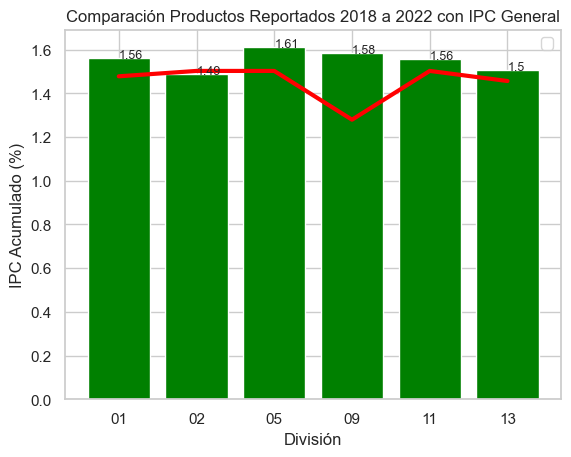

In [107]:
### Analisis de Productos por DIVISION

df_PreciosAgrupaP_Division = df_PreciosAgrupaP[df_PreciosAgrupaP['Año'].isin([v_EjecAño])]
df_PreciosAgrupaP_Division = df_PreciosAgrupaP_Division.groupby(['Division','Denominación Division']).agg({'Pre_Var12Acum': lambda x: (x.mean(skipna=True)*1)*1 , 'Ind_Var12Acum': lambda x: (x.mean(skipna=True))}).reset_index() # lo paso a % para graficar

plt.bar(df_PreciosAgrupaP_Division['Division'], df_PreciosAgrupaP_Division['Pre_Var12Acum'],  color='green')

# Agrega la línea fija con IPC
x = df_PreciosAgrupaP_Division['Division']
y = df_PreciosAgrupaP_Division['Ind_Var12Acum']
plt.plot(x, y, linestyle='-', linewidth=3, color='red')

plt.xlabel('División')
plt.ylabel('IPC Acumulado (%)')
plt.title('Comparación Productos Reportados ' + str(v_AñosContexto[1]) + ' a ' + str(v_AñosContexto[-1]) + ' con IPC General')
plt.legend()

for i in range(len(df_PreciosAgrupaP_Division)):
    plt.text(df_PreciosAgrupaP_Division['Division'].iloc[i], df_PreciosAgrupaP_Division['Pre_Var12Acum'].iloc[i], round(df_PreciosAgrupaP_Division['Pre_Var12Acum'].iloc[i],2), fontsize=9)

print(df_IPC_Divisiones)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


   Grupo                                 Denominación Grupo
0    011                                          Alimentos
1    012                             Bebidas no alcohólicas
2    021                                Bebidas alcohólicas
3    023                                             Tabaco
4    031                                               Ropa
5    041                      Alquileres reales de vivienda
6    044  Abastecimiento de agua y servicios diversos re...
7    045             Electricidad, gas y otros combustibles
8    051  Mobiliario, enseres domésticos y alfombras sue...
9    061                Medicamentos y productos sanitarios
10   062                  Servicios de atención ambulatoria
11   063                 Servicios de atención hospitalaria
12   071                                Compra de vehículos
13   072         Operación de equipo de transporte personal
14   073                Servicios de transporte de pasajero
15   083            Servicios de informa

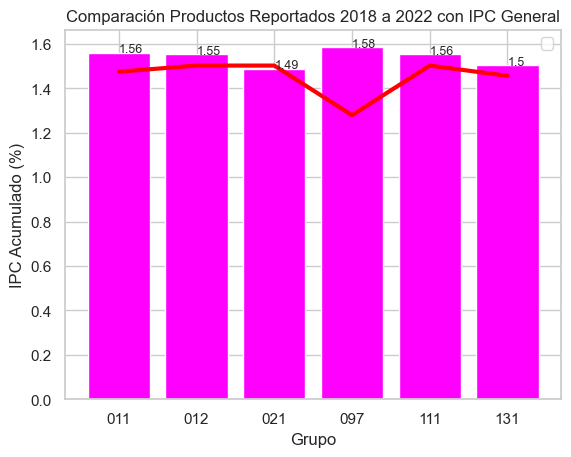

In [108]:
### Analisis de Productos por GRUPO

df_PreciosAgrupaP_Grupo = df_PreciosAgrupaP[df_PreciosAgrupaP['Año'].isin([v_EjecAño])]
df_PreciosAgrupaP_Grupo = df_PreciosAgrupaP_Grupo.groupby(['Grupo','Denominación Grupo']).agg({'Pre_Var12Acum': lambda x: (x.mean(skipna=True)*1)*1 , 'Ind_Var12Acum': lambda x: (x.mean(skipna=True))}).reset_index() # lo paso a % para graficar

plt.bar(df_PreciosAgrupaP_Grupo['Grupo'], df_PreciosAgrupaP_Grupo['Pre_Var12Acum'],  color='magenta')

# Agrega la línea fija con IPC
x = df_PreciosAgrupaP_Grupo['Grupo']
y = df_PreciosAgrupaP_Grupo['Ind_Var12Acum']
plt.plot(x, y, linestyle='-', linewidth=3, color='red')

plt.xlabel('Grupo')
plt.ylabel('IPC Acumulado (%)')
plt.title('Comparación Productos Reportados ' + str(v_AñosContexto[1]) + ' a ' + str(v_AñosContexto[-1]) + ' con IPC General')
plt.legend()

for i in range(len(df_PreciosAgrupaP_Grupo)):
    plt.text(df_PreciosAgrupaP_Grupo['Grupo'].iloc[i], df_PreciosAgrupaP_Grupo['Pre_Var12Acum'].iloc[i], round(df_PreciosAgrupaP_Grupo['Pre_Var12Acum'].iloc[i],2), fontsize=9)

print(df_IPC_Grupo)
plt.show()


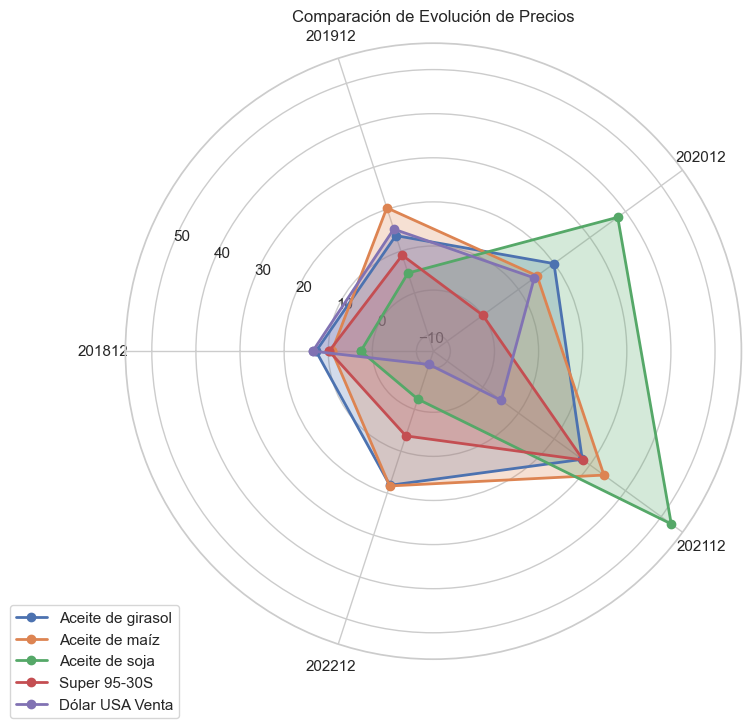

In [109]:
# Desafio 3: Construyo gráfico radar con variables de interes del usuario para ver la correlación anual de las distintas variaciónes

# Obtengo lista de productos y nombre de productos para graficar
v_id_Productos = df_Productos['id_Producto'].to_numpy()
v_nom_Productos = df_Productos['producto'].to_numpy()

u_variables = [1, 4, 7, 3001, 3501]  # El usuario determina las variables a comparar

datos = {}  # donde se van a almacenar las n variables
n_variables = []
for ii in u_variables:
    v_posicion = np.where(v_id_Productos == ii)[0][0]
    valor_extraido = v_nom_Productos[v_posicion]
    n_variables.append(valor_extraido)

for variable in u_variables:
    datos[variable] = []
    for anomes in v_AnoMes_FiltroR:
        # Seleccionar los registros del DataFrame que coinciden con 'anomes' y 'variable'
        df_filtrado = df_PreciosAgrupaP.loc[
            (df_PreciosAgrupaP['Cod_AnoMes'] == anomes) & (df_PreciosAgrupaP['id_Producto'] == variable)
        ]

        # Si se encuentra al menos un registro, obtener el valor de la columna 'Ind_Var12' y añadirlo a la lista 'valores'
        if not df_filtrado.empty:
            valores = (df_filtrado['Pre_Var'].values[0] - 1) * 100
            datos[variable].append(valores)
        # Si no se encuentra ningún registro, añadir 'NaN' a la lista 'valores'
        else:
            datos[variable].append(np.nan)

# Crear el gráfico
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
ax.set_thetagrids(np.linspace(0, 360, len(v_AnoMes_FiltroR), endpoint=False), v_AnoMes_FiltroR)  # para sustituir los años por los grados en las etiquetas
ax.set_theta_direction(-1)  # hacia donde se desplazan los valores
ax.set_theta_offset(np.pi)  # donde comienza, pi es izquierda

# Crear los ángulos para cada variable
angulos = np.linspace(0, 2 * np.pi, len(u_variables) + 1)

# Crear los valores para cada variable
for i, variable in enumerate(u_variables):
    valores = datos[variable]
    valores += valores[:1]
    ax.plot(angulos, valores, 'o-', linewidth=2, label=n_variables[i])
    ax.fill(angulos, valores, alpha=0.25)

# Configurar el gráfico
ax.set_title('Comparación de Evolución de Precios')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


In [110]:
#print(type(angulos))
#print((valores))
#print(len(valores))
#print(type(valores))
#print((angulos))
#print(len(angulos))


In [111]:
# Desafio 3: construyo un pequeño Frankestein
### Las "variables especiales" que me interesa meter al modelo que están como filas del dataframe mayor las agrego como columnas. Así puedo tener el listado de productos generales y la variacion del IPC y las variables de interés; asocio de esta manera en una fila un producto y n variables de interes

### Me quedo sólo con los productos especiales para construir las columnas 
df_filtrado = df_PreciosAgrupaP[df_PreciosAgrupaP["PrEsp"] == True]

# Obtengo los valores únicos de "id_Producto"
id_productos_unicos = df_filtrado["id_Producto"].unique()

df_PreciosAgrupaP2 = df_PreciosAgrupaP # creo DF que va a cruzar de forma incremental con las distintas nuevas columnas
for id_producto in id_productos_unicos: # recorro el nuevo dataset
    ###  registros correspondientes a cada "id_Producto"
    df_productoTmp = df_filtrado[df_filtrado["id_Producto"] == id_producto]
    
    ### Asigno un nombre a la variable del DF creado
    nombre_variable = "df_Esp_" + str(id_producto)
    
    ### Asigno el dataframe a la variable en el entorno global
    globals()[nombre_variable] = df_productoTmp

    ### limpio el DF para no duplicar columnas en el merge
    tmp_col_elimina = ['Año', 'Mes', 'Precio', 'Ind_Var12', 'PrEsp', 'Pre_Var12Acum' , 'Ind_Var12Acum', 'id_Producto', 'producto', 'marca', 'especificacion', 'nombre', 'Producto', 'Subclase', 'Clase', 'Grupo', 'Division', 'Denominación Grupo', 'Denominación Clase', 'Denominación Division']
    globals()[nombre_variable] = globals()[nombre_variable].drop(tmp_col_elimina, axis=1)

    globals()[nombre_variable].rename(columns={"Pre_Var": "id_" + str(id_producto) }, inplace=True)

    ### voy agregando columnas nuevas
    df_PreciosAgrupaP2 = pd.merge(df_PreciosAgrupaP2, globals()[nombre_variable], on='Cod_AnoMes', how='left')


1-Aceite de girasol
4-Aceite de maíz
7-Aceite de soja
22-Arvejas en conserva


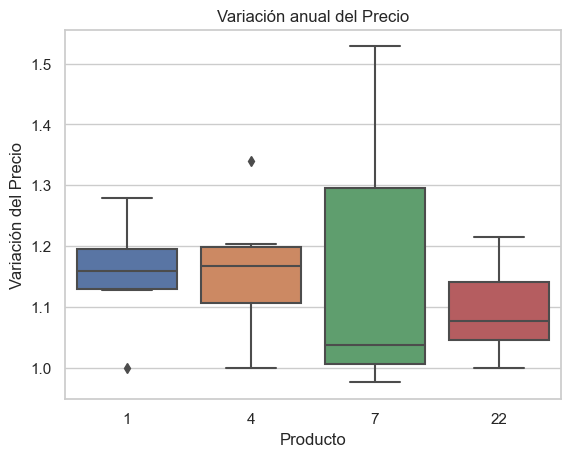

In [112]:
# Desafio 3: Analisis de dispersión preliminar que le interese al operador
### Análisis de productos específicos
v_ProductoAnalisis = [1,4,7,22]  # Valores que ingresa el operador
n_variables = []
for ii in v_ProductoAnalisis:
    v_posicion = np.where(v_id_Productos == ii)[0][0]
    valor_extraido = v_nom_Productos[v_posicion]
    n_variables.append(valor_extraido)

df_PreciosAgrupaP2_Fil = df_PreciosAgrupaP2[df_PreciosAgrupaP2['id_Producto'].isin(v_ProductoAnalisis)]
sns.boxplot(x='id_Producto', y='Pre_Var', data=df_PreciosAgrupaP2_Fil)
plt.title("Variación anual del Precio")
plt.xlabel('Producto')
plt.ylabel('Variación del Precio')

### Imprimo así provisorio hasta no agregar los nombres a la gráfica, el tema si son muchos productos el nombre largo complica la visualización
for i in range(len(n_variables)):
    print(str(v_ProductoAnalisis[i]) + "-" + n_variables[i])

Text(0, 0.5, 'Variación del Precio')

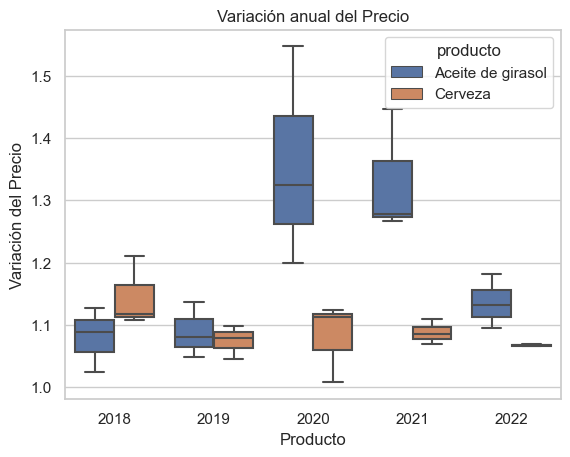

In [113]:
# Desafio 3: Preparo un nuevo dataframe para agrupar por distintas categorias
### En principio son variables cualquiera que elegi, pero la idea es que el modelo las elija en base a criterios establecidos luego de un análisis primario.

#df_PreciosAgrupaP3 = df_PreciosAgrupaP2  #pd.merge(df_PreciosAgrupaP2, df_Productos, on='id_Producto', how='left')

### Análisis de productos específicos
v_ProductoAnalisis = [1,2,3,31,32,33]
n_variables = []
for ii in v_ProductoAnalisis:
    v_posicion = np.where(v_id_Productos == ii)[0][0]
    valor_extraido = v_nom_Productos[v_posicion]
    n_variables.append(valor_extraido)

df_PreciosAgrupaP2_Fil = df_PreciosAgrupaP2[df_PreciosAgrupaP2['id_Producto'].isin(v_ProductoAnalisis) & df_PreciosAgrupaP2['Cod_AnoMes'].isin(v_AnoMes_FiltroR)]
sns.boxplot(x='Año', y='Pre_Var', hue='producto', data=df_PreciosAgrupaP2_Fil)
plt.title("Variación anual del Precio")
plt.xlabel('Producto')
plt.ylabel('Variación del Precio')


In [114]:
# (Desafío 3)
### Busco correlación con variables
### En este ejemplo los códigos "1,2,3" son del aceite de girasol. Por el resumen del modelo podría tener relación con id_3501 (dólar) pero no con id_3003 (Gasoil). Por ejemplo, para saber si el precio de este insumo en la producción impacta en la variación del precio.

import statsmodels.formula.api as sm
import chart_studio.plotly as py

### Análisis de productos específicos
v_ProductoAnalisis = [1,2,3, 3003, 3501]   # id_Producto: lo ingresa el usuario

n_variables = []
for ii in v_ProductoAnalisis:
    v_posicion = np.where(v_id_Productos == ii)[0][0]
    valor_extraido = v_nom_Productos[v_posicion]
    n_variables.append(valor_extraido)
    
df_PreciosAgrupaP3_Fil = df_PreciosAgrupaP2[df_PreciosAgrupaP2['id_Producto'].isin(v_ProductoAnalisis) & df_PreciosAgrupaP2['Cod_AnoMes'].isin(v_AnoMes_FiltroR)]

model1 = 'Precio~id_3003 + id_3501'
lml = sm.ols(formula=model1, data = df_PreciosAgrupaP3_Fil).fit()
print(lml.summary())

### tomo una variable donde se dice que el precio de los combustibles afecta su precio, entonces los códigos=1,2,3 son de aceites de girasol y construyo el modelo con 3003 gasoil y 3501 cotización usd, ambas variables representadas por su variación, en este caso anual

### Este primer análisis no parece arrojar valores lógicos, se analizará

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     4.621
Date:                Tue, 20 Jun 2023   Prob (F-statistic):             0.0211
Time:                        20:01:49   Log-Likelihood:                -118.12
No. Observations:                  25   AIC:                             242.2
Df Residuals:                      22   BIC:                             245.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    551.3360    297.046      1.856      0.0

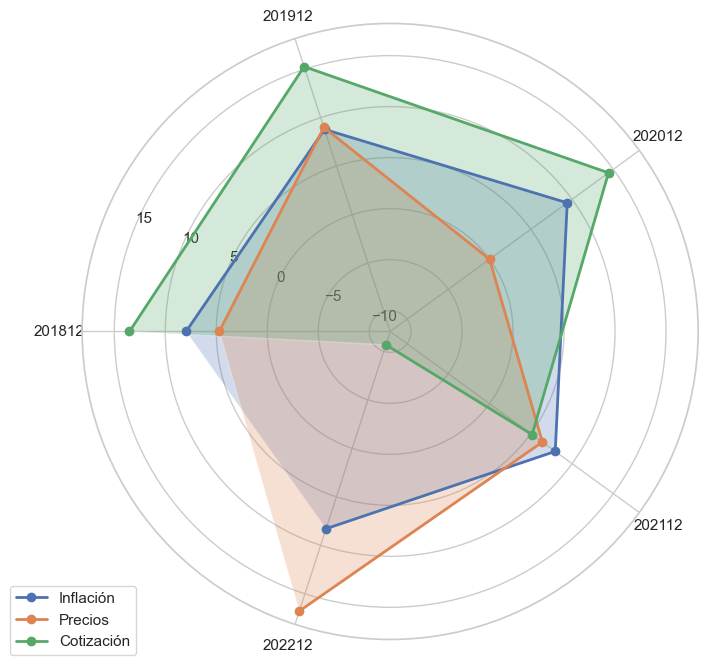

In [115]:
# Desafío 3: Construyo un gráfico radial para ver la correlación (visual) entre la variación entre distintas variables, inflación, precios de productos y cotización

# Crear una lista vacía para almacenar los valores de la columna 'Ind_Var12'
g_inflacion = []
# Iterar sobre los valores de 'v_AnoMes_FiltroR'
for anomes in v_AnoMes_FiltroR:
    # Seleccionar los registros del DataFrame que coinciden con 'anomes'
    df_filtrado = df_ipcGralReducido.loc[df_ipcGralReducido['Cod_AnoMes'] == anomes]
    # Si se encuentra al menos un registro, obtener el valor de la columna 'Ind_Var12' y añadirlo a la lista 'inflacion'
    if not df_filtrado.empty:
        g_inflacion.append(df_filtrado.iloc[0]['Ind_Var12'])
    # Si no se encuentra ningún registro, añadir 'NaN' a la lista 'inflacion'
    else:
        g_inflacion.append(np.nan)

g_precios = []
# Iterar sobre los valores de 'v_AnoMes_FiltroR'
for anomes in v_AnoMes_FiltroR:
    # Seleccionar los registros del DataFrame que coinciden con 'anomes'
    df_filtrado = df_PreciosAgrupaP.loc[(df_PreciosAgrupaP['Cod_AnoMes'] == anomes) & (df_PreciosAgrupaP['id_Producto'] == 3003)]
    # Si se encuentra al menos un registro, obtener el valor de la columna 'Ind_Var12' y añadirlo a la lista 'inflacion'
    if not df_filtrado.empty:
        g_precios.append(df_filtrado.iloc[0]['Pre_Var'])
    # Si no se encuentra ningún registro, añadir 'NaN' a la lista 'inflacion'
    else:
        g_precios.append(np.nan)
g_precios = [(x - 1) * 100 for x in g_precios]

g_cotizacion = []
# Iterar sobre los valores de 'v_AnoMes_FiltroR'
for anomes in v_AnoMes_FiltroR:
    # Seleccionar los registros del DataFrame que coinciden con 'anomes'
    df_filtrado = df_PreciosAgrupaP.loc[(df_PreciosAgrupaP['Cod_AnoMes'] == anomes) & (df_PreciosAgrupaP['id_Producto'] == 3501)]
    # Si se encuentra al menos un registro, obtener el valor de la columna 'Ind_Var12' y añadirlo a la lista 'inflacion'
    if not df_filtrado.empty:
        g_cotizacion.append(df_filtrado.iloc[0]['Pre_Var'])
    # Si no se encuentra ningún registro, añadir 'NaN' a la lista 'inflacion'
    else:
        g_cotizacion.append(np.nan)
g_cotizacion = [(x - 1) * 100 for x in g_cotizacion]

# Crear el gráfico de radar
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
ax.set_thetagrids(np.linspace(0, 360, len(v_AnoMes_FiltroR) + 1)[:-1], v_AnoMes_FiltroR) # para sustituir los años por los grados en las etiquetas
ax.set_theta_direction(-1) # hacia donde se desplazan los valores
ax.set_theta_offset(np.pi) # donde comienza, pi es izquierda


inflacion = np.concatenate((g_inflacion[:-1], [g_inflacion[0]]))
precios = np.concatenate((g_precios[:-1], [g_precios[0]]))
cotizacion = np.concatenate((g_cotizacion[:-1], [g_cotizacion[0]]))

# Ángulos
angulos = np.linspace(0, 2*np.pi, len(g_inflacion), endpoint=False)
#angulos = angulos[1:]

# Datos de inflación
inflacion = np.concatenate((g_inflacion, [g_inflacion[0]]))
ax.plot(angulos, g_inflacion, 'o-', linewidth=2, label='Inflación')
ax.fill(angulos, g_inflacion, alpha=0.25)

# Datos de precios
precios = np.concatenate((g_precios, [g_precios[0]]))
ax.plot(angulos, g_precios, 'o-', linewidth=2, label='Precios')
ax.fill(angulos, g_precios, alpha=0.25)

# Datos de cotización
cotizacion = np.concatenate((g_cotizacion, [g_cotizacion[0]]))
ax.plot(angulos, g_cotizacion, 'o-', linewidth=2, label='Cotización')
ax.fill(angulos, g_cotizacion, alpha=0.25)

# Leyenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Mostrar el gráfico
plt.show()

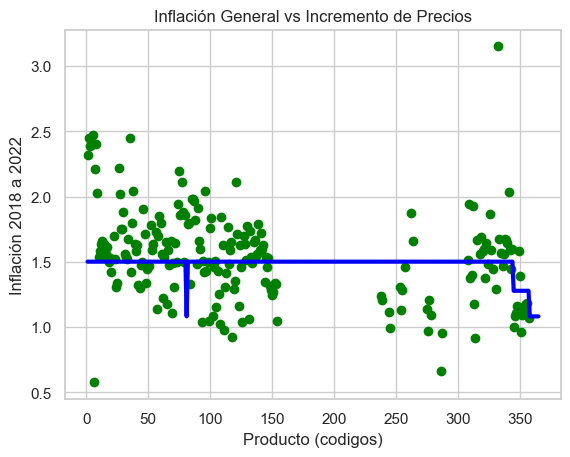

In [116]:
### DF de variación acumulada, filtra el último año
df_PreciosAgrupaP_G = df_PreciosAgrupaP[(df_PreciosAgrupaP['Cod_AnoMes'].isin(v_AnoMes_Ultimo)) & (df_PreciosAgrupaP['PrEsp'] == False)]  # DF para gráfico

# Crear el gráfico de dispersión
x = df_PreciosAgrupaP_G['id_Producto']
y = df_PreciosAgrupaP_G['Ind_Var12Acum']
z = df_PreciosAgrupaP_G['Pre_Var12Acum']

fig, ax = plt.subplots()
ax.scatter(x, z, color='green')

# Agregar la línea fija
ax.plot(x, y, label='Ind_Var12Acum', linestyle='-', linewidth=3, color='blue')

# Configurar las etiquetas y títulos
ax.set_xlabel('Producto (codigos)')
ax.set_ylabel('Inflación ' + str(v_AñosContexto[1]) + ' a ' + str(v_AñosContexto[-1]))
ax.set_title('Inflación General vs Incremento de Precios')
plt.show()


↑↑↑ <small>Insight 2: (gráfico anterior)<br>
La relación del aumento de precios de productos vs inflación es relativamente parejo en cantidad, es decir, similar cantidad de productos variaron más y otros tantos menos, aunque levemente hay más por encima de la línea azul (inflación acumulada). Notar que hay un rango de productos entre los 155 y los 237 que no están graficados ya que para Dic/22 se discontinuaron. Como mejoría futura trataré de graficar la inflación acumulada para cada producto.
</small>

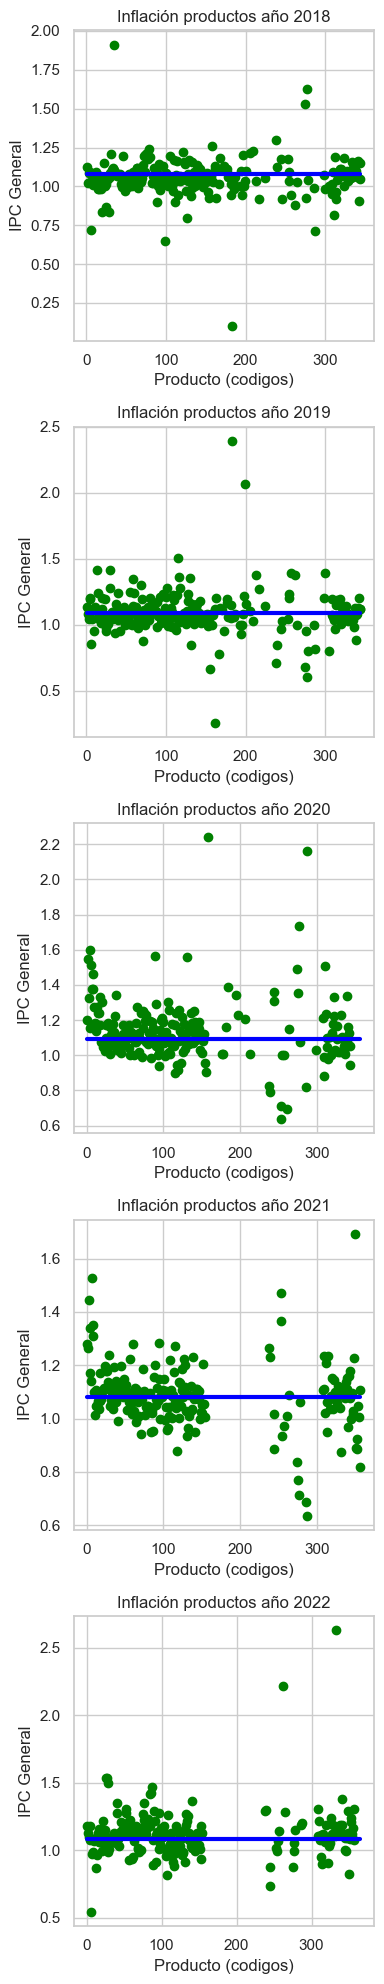

In [117]:
### Análisis de productos - Apertura por años
fig, axs = plt.subplots(nrows=len(v_AnoMes_FiltroR), ncols=1, figsize=(4, 4*len(v_AnoMes_FiltroR)))
for i, val in enumerate(v_AnoMes_FiltroR):
    # Filtrar el dataframe para incluir sólo las filas que corresponden al valor actual
    df_filt = df_PreciosAgrupaP[(df_PreciosAgrupaP["Cod_AnoMes"] == val) & (df_PreciosAgrupaP['PrEsp'] == False)]

    x = df_filt['id_Producto']
    y = df_filt['Ind_Var12']
    z = df_filt['Pre_Var']

    ax = axs[i]
    ax.scatter(x, z, color='green')

    v_MuestraAno = val // 100
    v_MuestraMes = (val % 100)
    
    # Agregar la línea fija
    ax.plot(x, y, label='Ind_Var12i', linestyle='-', linewidth=3, color='blue')
    if v_MuestraMes == 12:
        ax.set_title(f"Inflación productos año {str(v_MuestraAno)}")
    if v_MuestraMes < 12:
        ax.set_title(f"Inflación productos año {str(v_MuestraAno)} mes {str(v_MuestraMes)}")

    # Configurar las etiquetas y títulos
    ax.set_xlabel('Producto (codigos)')
    ax.set_ylabel('IPC General')
    #ax.set_title('Inflación General vs Incremento de Precios')

fig.tight_layout()
plt.show()


↑↑↑ <small>Insight 3: (gráfico anterior)
Similar al gráfico anterior pero desagregado por año. Esto sirve para comprobar, como se esperaba, que todos los años tuvieron similar comportamiento. Similar cantidad de productos con precios ajustados por encima y por debajo de la inflación. Hay un rango de productos que se dejaron de solicitar información en 2021
</small>

<small>(Indicio de respuesta a pregunta 6)</small>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


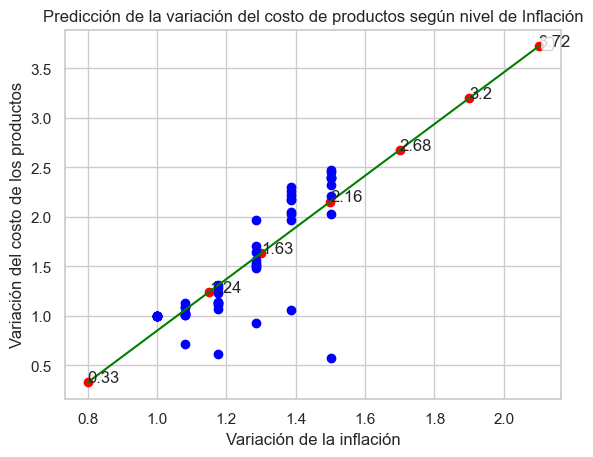

In [118]:
# Desafío 3: Gráfico de regresión lineal
### Me estaría indicando dado cierto nivel de inflación esperada (eje X) una posible variación del precio (eje Y). En este caso Aceite de girasol (codigos: 1,2,3)

### Parámetros
v_productos = [1,2,3,4,5,6,7,8,9]   # codigos de productos que entraría el operador
df_nuevo = df_PreciosAgrupaP[(df_PreciosAgrupaP['Cod_AnoMes'].isin(v_AnoMes_Filtro)) & (df_PreciosAgrupaP['id_Producto'].isin(v_productos))][['Pre_Var12Acum', 'Ind_Var12Acum']]  # Filtro productos y año/mes
v_entrada =[[0.8],[1.15],[1.3],[1.5],[1.7],[1.9],[2.1]]  # valores de inflación que ingresaría un usuario
###-----------------------------

v_tipoRegresion = linear_model.LinearRegression()  # traigo el creador del modelo

### el modelo que traje requiere un formato que contemple multiples vectores, en este caso sólo 1 pero hay que adapatar la forma
v_Ind_Var12Acum = df_nuevo["Ind_Var12Acum"].values.reshape((-1,1))

### parámetros: variable indep. (tiempo/inflación), variable depen. (incremento precio)
v_modeloRegresion = v_tipoRegresion.fit(v_Ind_Var12Acum, df_nuevo["Pre_Var12Acum"])
#print("Interseccion (b)", v_modeloRegresion.intercept_) # intersección x=0
#print("Pendiente (m)", v_modeloRegresion.coef_)  # pendiente de la recta

v_modeloRegresion.predict(v_entrada) # me predice valores

plt.title("Predicción de la variación del costo de productos según nivel de Inflación")
plt.xlabel("Variación de la inflación")
plt.ylabel("Variación del costo de los productos")

# Predicciones del modelo:
plt.scatter(v_entrada, v_modeloRegresion.predict(v_entrada), color = "red")
for i, valor in enumerate(v_modeloRegresion.predict(v_entrada)):
    plt.text(v_entrada[i][0], valor, round(valor,2))
    #print(valor)

# Info real
plt.scatter(df_nuevo["Ind_Var12Acum"], df_nuevo["Pre_Var12Acum"], color= "blue")

# regresión ajustada:
plt.plot(v_entrada, v_modeloRegresion.predict(v_entrada), color = "green")

plt.legend()
plt.show()


<small>(Respuesta pregunta 5)</small>

C:\Users\sloti\AppData\Local\Temp\ipykernel_4188\3486152255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PreciosAgrupaP_G2.loc[:, 'DesAcum'] = df_PreciosAgrupaP_G2['Pre_Var12Acum']- df_PreciosAgrupaP_G2.loc[:,'Ind_Var12Acum']


d:\Programacion\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


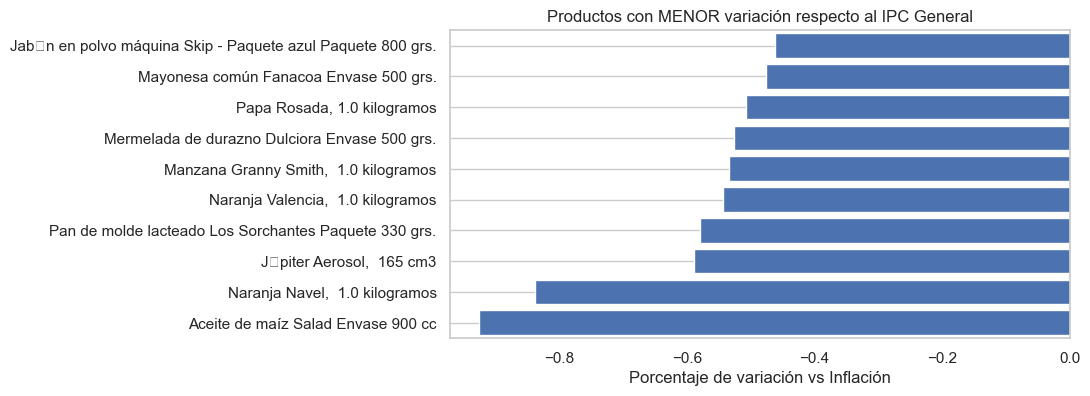

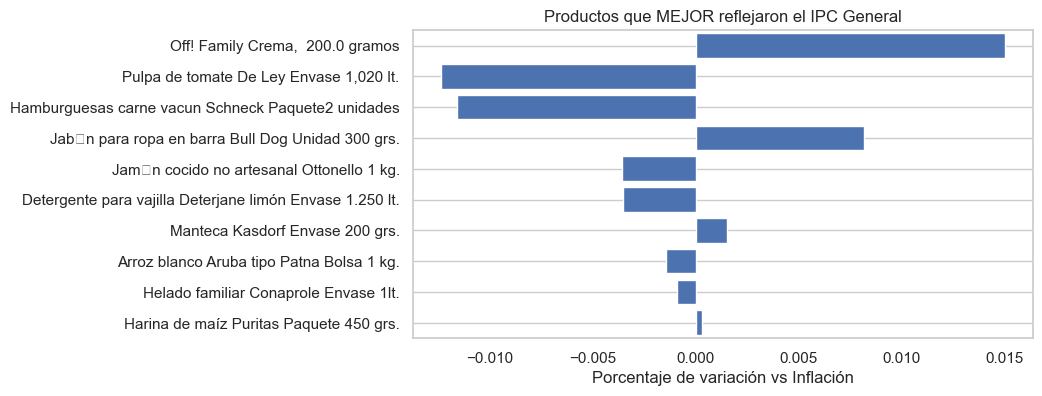

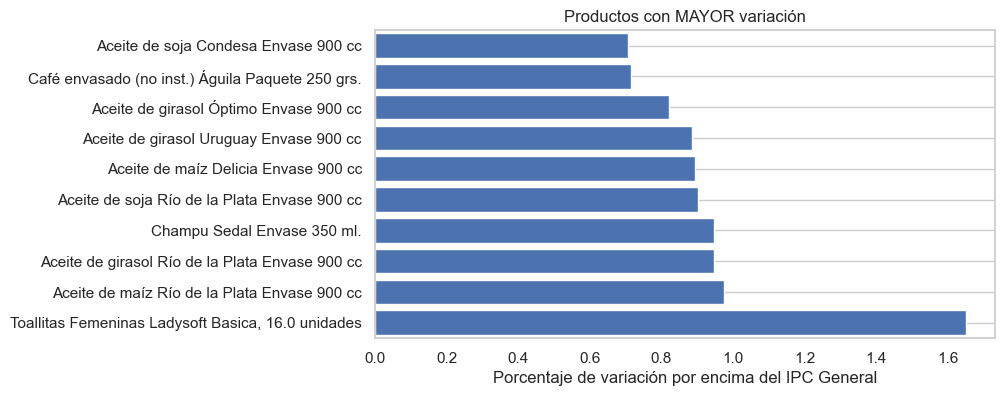

In [119]:
### Análisis de Productos -> GRAFICOS "top"
### Prepara gráficos: Top 10 menores variaciones, top 10 mayores variaciones y top 10 variaciones mas cercanas a cero (es decir que acompañan IPC)

df_PreciosAgrupaP_G2 = df_PreciosAgrupaP[df_PreciosAgrupaP['Cod_AnoMes'].isin(v_AnoMes_Ultimo)]   # DF para gráfico

### Agrega columna con variación Producto vs inflación
df_PreciosAgrupaP_G2.loc[:, 'DesAcum'] = df_PreciosAgrupaP_G2['Pre_Var12Acum']- df_PreciosAgrupaP_G2.loc[:,'Ind_Var12Acum']

### Top 10 menores diferencias
df_ProductosPromAcum_Menor = df_PreciosAgrupaP_G2.nsmallest(10, 'DesAcum')
df_ProductosPromAcum_Menor['DesAcumP'] = (df_ProductosPromAcum_Menor['DesAcum'] * 100).map('{:.0f}%'.format)

### Top 10 mayores diferencias
df_ProductosPromAcum_Mayor = df_PreciosAgrupaP_G2.nlargest(10, 'DesAcum')
df_ProductosPromAcum_Mayor['DesAcumP'] = (df_ProductosPromAcum_Mayor['DesAcum'] * 100).map('{:.0f}%'.format)

### Top 10 mas cercanas a cero (productos que mejor reflejaron la inflación)
df_sorted = df_PreciosAgrupaP_G2.loc[df_PreciosAgrupaP_G2['DesAcum'].abs().sort_values().index]
df_ProductosPromAcum_Cero = df_sorted.head(10)
###df_ProductosPromAcum_Cero = df_ProductosPromAcum['DesAcum'].nsmallest(10, key=lambda x: abs(x))
###df_ProductosPromAcum_Cero

#df_merge_ProductosMenor = pd.merge(df_ProductosPromAcum_Menor, df_Productos, on='id_Producto', how='inner')
fig, ax1 = plt.subplots(figsize=(8, 4))
x_ax1 = df_ProductosPromAcum_Menor['DesAcum']
y_ax1 = df_ProductosPromAcum_Menor['nombre']
ax1.barh(range(len(y_ax1)), x_ax1, height=0.8, align='center')
ax1.set_ylim(-0.5, len(y_ax1)-0.5)
ax1.set_yticks(range(len(y_ax1)))
ax1.set_yticklabels(y_ax1)
ax1.set_xlabel('Porcentaje de variación vs Inflación')
ax1.set_title('Productos con MENOR variación respecto al IPC General')
ax1.grid(axis='x')

#df_merge_ProductosCero = pd.merge(df_ProductosPromAcum_Cero, df_Productos, on='id_Producto', how='inner')
fig, ax3 = plt.subplots(figsize=(8, 4))
x_ax3 = df_ProductosPromAcum_Cero['DesAcum']
y_ax3 = df_ProductosPromAcum_Cero['nombre']
ax3.barh(range(len(y_ax3)), x_ax3, height=0.8, align='center')
ax3.set_ylim(-0.5, len(y_ax3)-0.5)
ax3.set_yticks(range(len(y_ax3)))
ax3.set_yticklabels(y_ax3)
ax3.set_xlabel('Porcentaje de variación vs Inflación')
ax3.set_title('Productos que MEJOR reflejaron el IPC General')
ax3.grid(axis='x')

#df_merge_ProductosMayor = pd.merge(df_ProductosPromAcum_Mayor, df_Productos, on='id_Producto', how='inner')
fig, ax2 = plt.subplots(figsize=(8, 4))
x_ax2 = df_ProductosPromAcum_Mayor['DesAcum']
y_ax2 = df_ProductosPromAcum_Mayor['nombre']
ax2.barh(range(len(y_ax2)), x_ax2, height=0.8, align='center')
ax2.set_ylim(-0.5, len(y_ax2)-0.5)
ax2.set_yticks(range(len(y_ax2)))
ax2.set_yticklabels(y_ax2)
ax2.set_xlabel('Porcentaje de variación por encima del IPC General')
ax2.set_title('Productos con MAYOR variación')
ax2.grid(axis='x')

plt.show()


↑↑↑ <small>Insight 4: (gráfico anterior)<br>
Obtengo 3 juegos de datos: los productos con mayor variación respecto a la inflación, los que menos variarión y los que variaron de acuerdo a la inflación. Este último grupo podría ser usado para proyectar la inflación futura (el "Talco Xanapie" fue el que se comportó más parecido a la inflación)
</small>

In [120]:
del df_PreciosAgrupaP_G, df_PreciosAgrupaP_G2  # libera memori

d:\Programacion\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

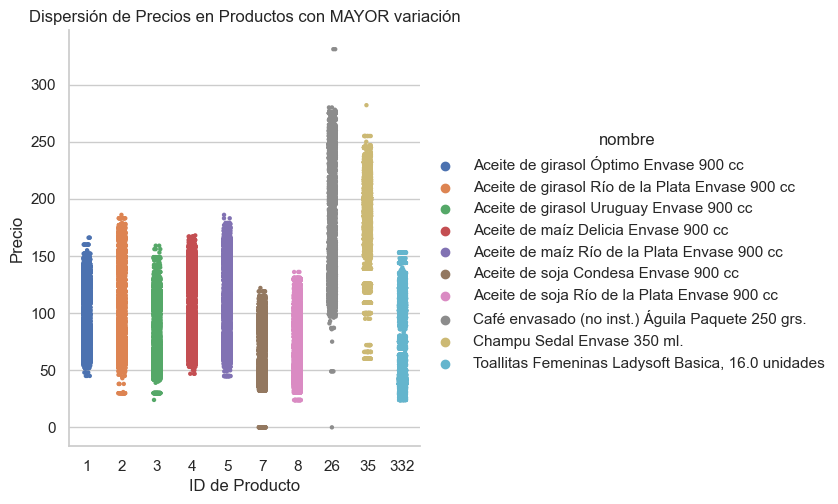

In [121]:
### Preparar el gráfico de dispersión (seaborn)
lista_mayor = df_ProductosPromAcum_Mayor['id_Producto'].tolist()
df_PreciosMayor = df_PreciosAgrupa[df_PreciosAgrupa['id_Producto'].isin(lista_mayor)]
df_PreciosMayor2 = pd.merge(df_PreciosMayor, df_Productos, on='id_Producto', how='inner')
#df_PreciosMayor3 = pd.merge(df_PreciosMayor2, df_Establecimientos_Reducido, on='id_Estab', how='inner')

sns.catplot(x='id_Producto', y="Precio", data=df_PreciosMayor2, kind='strip', jitter=True, hue='nombre', s=10)
plt.title('Dispersión de Precios en Productos con MAYOR variación')
plt.xlabel('ID de Producto')
plt.ylabel('Precio')
plt.show


↑↑↑ <small>Insight 5: (gráfico anterior)<br>
Dentro de los productos con mayor variación de precios hay algunos con enorme variación como el "Café envasado no instantáneo Aguila" y algunos con no tanta dispersión como algunos Aceites de soja. Sirve para ver valores atípicos dentro de cada producto, notandose que no hay muchos. Se descarta variación debido a alteración en estos valores atípicos que son pocos.
</small>

In [122]:
del df_PreciosMayor   # libera memoria
del df_ProductosPromAcum_Menor, df_ProductosPromAcum_Cero, df_ProductosPromAcum_Mayor

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


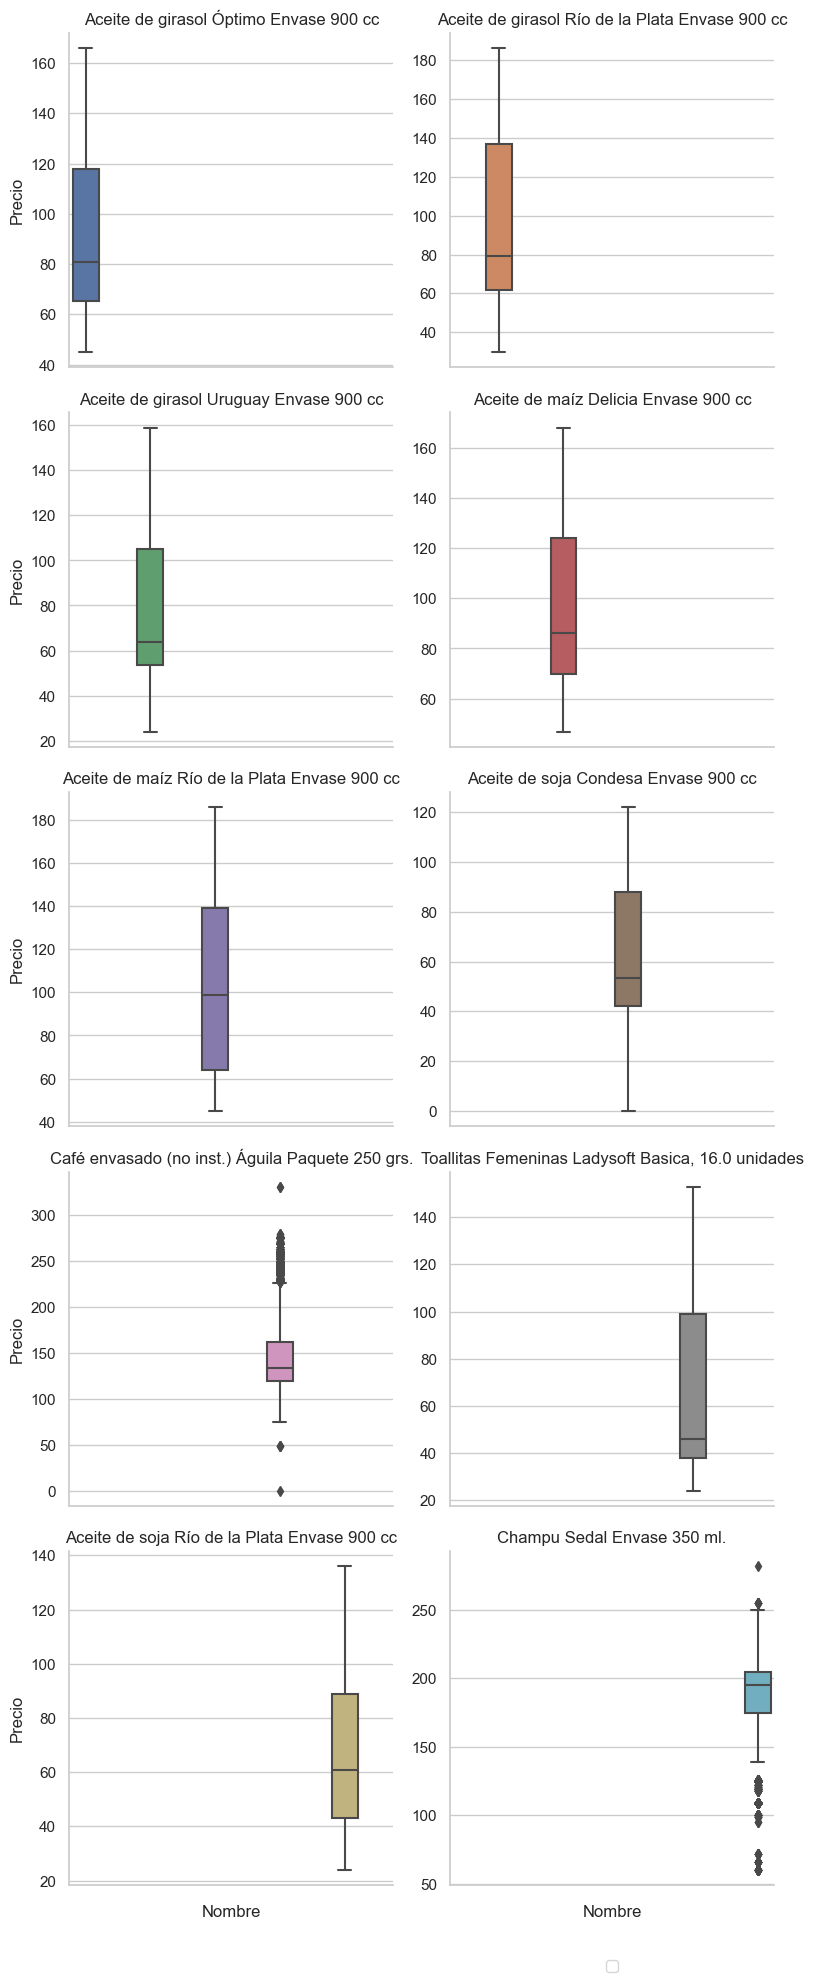

In [123]:
sns.set(style="whitegrid")

g = sns.catplot(x='nombre', y='Precio', data=df_PreciosMayor2, kind='box', col='nombre', col_wrap=2, height=4, aspect=1, legend_out=False, dodge=0.1,  margin_titles=True, sharey=False)

g.set_axis_labels('Nombre', 'Precio')
g.set_xticklabels(fontsize=12, rotation=90, ha='right')
g.set_titles('{col_name}')

plt.legend(bbox_to_anchor=(0.5, -0.2), ncol=1, loc='upper center')
plt.rcParams['font.family'] = 'Arial'
plt.tight_layout()
plt.show()

↑↑↑ <small> Insight 6: (gráfico anterior)<br>
Los siguientes gráficos muestran por separado y luego todos juntos la dispersión y valores atípicos de los productos con mayor variación. Los aceites muestran un comportamiento similar respecto a la media, algunos desplazados a la derecha y otros a la izquierda y generalmente sin valores atícos, cosa que no pasa con por ejemplo el 'calabacín' y el 'café'
</small>

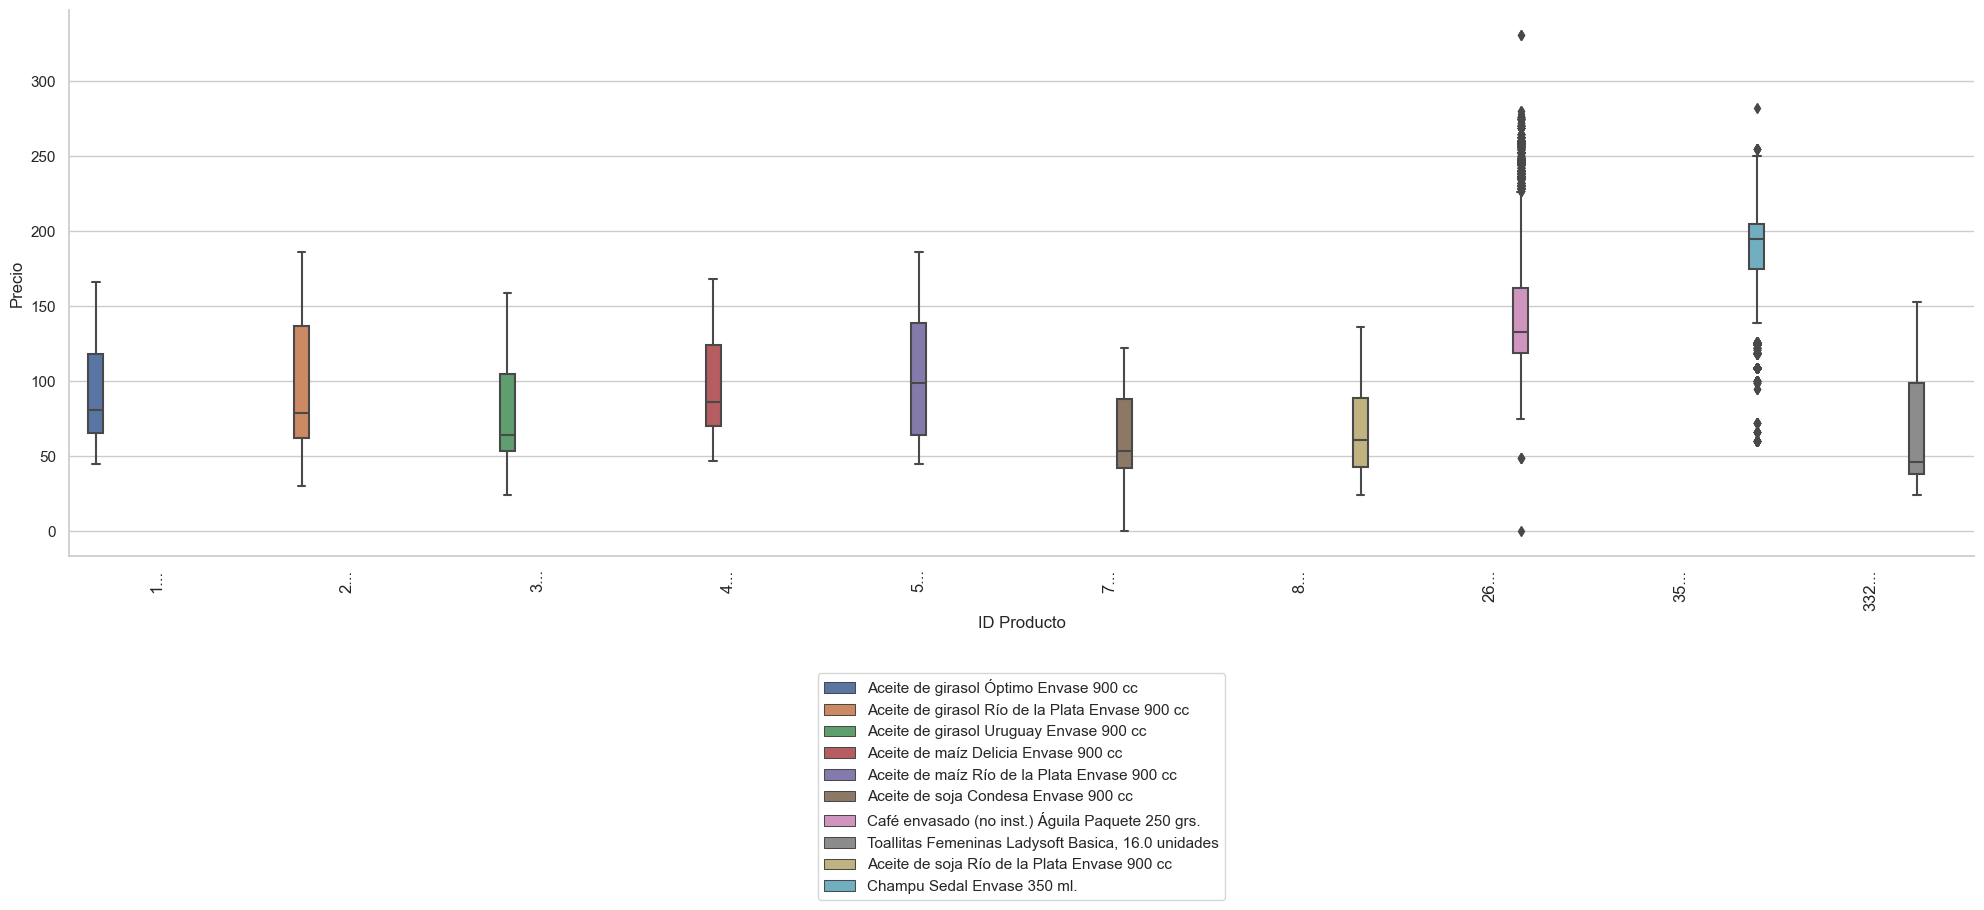

In [124]:
### Mismos productos anteriores pero ahora en una sóla gráfica a efectos de comparar

#  & (df_PreciosAgrupa['PrEsp'] == False)

sns.set(style="whitegrid")

g = sns.catplot(x='id_Producto', y='Precio', data=df_PreciosMayor2, kind='box', hue='nombre', height=10, aspect=2, legend_out=False, dodge=0.1, margin_titles=True)

g.set_axis_labels('ID Producto', 'Precio')
g.set_xticklabels(g.ax.get_xticklabels(), fontsize=12, rotation=90, ha='right')
g.ax.set_xticklabels([str(x.get_text()).replace('_', ' ').title()[:10] + '...' for x in g.ax.get_xticklabels()])

plt.legend(bbox_to_anchor=(0.5, -0.2), ncol=1, loc='upper center')

plt.tight_layout()
plt.show()

In [125]:
del df_PreciosMayor2   # libera memoria

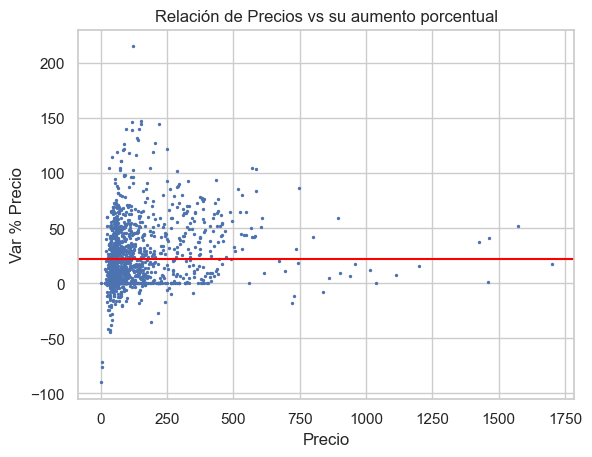

In [126]:
### Grafica de dispersión que relaciona Precios y sus variaciones

df_filt = df_PreciosAgrupaP[(df_PreciosAgrupaP['PrEsp'] == False)]

v_PromIPC = (df_filt['Ind_Var12Acum'].mean()-1)*100
plt.axhline(y=v_PromIPC, color='red', linestyle='-')

plt.scatter(df_filt['Precio'],(df_filt['Pre_Var12Acum']-1)*100 ,s=2)
plt.xlabel('Precio')
plt.ylabel('Var % Precio')
plt.gca().yaxis.grid(True)
plt.title('Relación de Precios vs su aumento porcentual')
plt.show()

↑↑↑ <small> Insight 8: (gráfico anterior) <br>
Para el período considerado (2018-2022) la línea roja es la inflación acumulada. Los valores por encima son de productos que variaron más que la inflación. Así se ve que los productos entre $u 250 a 750 por lo general variaron más que la inflación. Los más bajos hasta $u 250 bastante repartido aunque levemente más. Los pocos productos mayores a $u 750 todos variaron por debajo del IPC.
</small>

In [127]:
del df_filt  # libera memoria

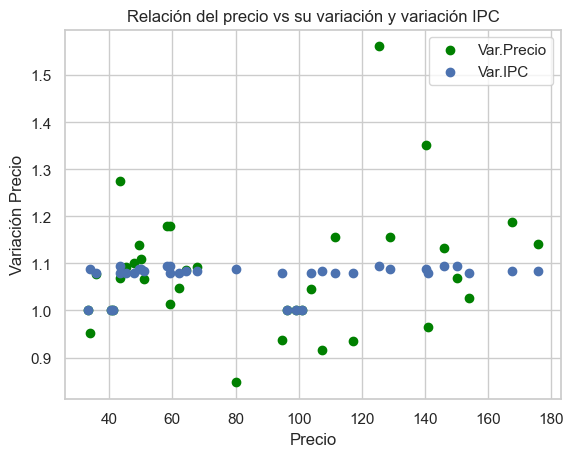

In [128]:
### Analisis de un producto: su precio vs su variación
### Pretende mostrar, de cierto producto o grupo de productos, la relación entre su precio y el aumento que tuvo
### Ejemplo: la subclase=11111 (Alim y bebidas) muestra una menor dispersión en rango bajo de precios y una mayor dispersión y suba en precios altos

df_Filtrado = df_PreciosAgrupaP[(df_PreciosAgrupaP["PrEsp"] == False)] #& df_PreciosAgrupaP["Cod_AnoMes"].isin([v_AnoMes_Ultimo])]
df_Filtrado = df_Filtrado[df_Filtrado["Subclase"] == "11111"]  # Subclase la ingresaría un operador

plt.scatter(df_Filtrado["Precio"], df_Filtrado["Pre_Var"], color="green", label="Var.Precio")
plt.scatter(df_Filtrado["Precio"], df_Filtrado["Ind_Var12"], label="Var.IPC")
plt.xlabel("Precio")
plt.ylabel("Variación Precio")
plt.legend()
plt.title("Relación del precio vs su variación y variación IPC")
plt.show()


↑↑↑ <small>La dispersión de precio se da en productos de mayor valor. Se observa que en productos de más bajo precio la variación porcentual con la inflación es menor.
</small>

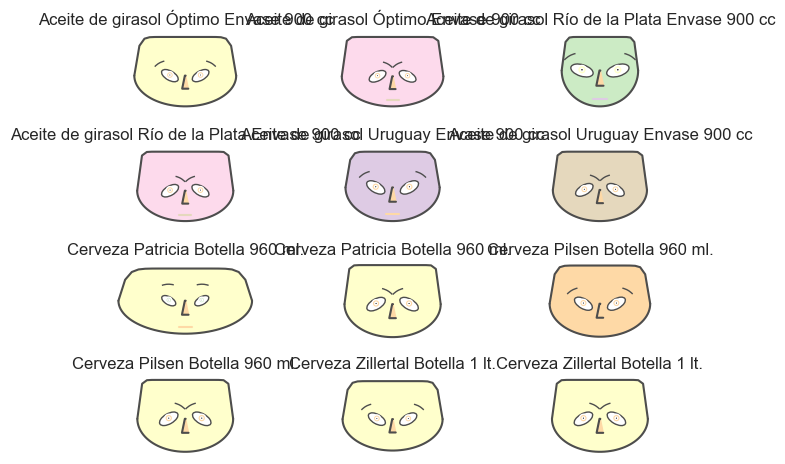

In [129]:
### Desafío 3: Me planteo hacer un gráfico de Chernoff
### Tengo que ver el tema de la longitud del nombre, es meramente ilustrativo para el desafío.

from ChernoffFace import *
import numpy
import matplotlib.cm

v_Año = [v_AñosContexto[-1],v_AñosContexto[1]]   ### Años punta a punta del período, lo ingresa el operador
df_PreciosAgrupaP2_Filb = df_PreciosAgrupaP2_Fil[df_PreciosAgrupaP2_Fil['Año'].isin(v_Año)]

df_PreciosAgrupaP2_Filb = df_PreciosAgrupaP2_Filb.reset_index(drop=True)

variables  = ['Pre_Var', 'Ind_Var12', 'id_3001', 'id_3002', 'id_3003', 'id_3501'] # variables a representar

df_variables = df_PreciosAgrupaP2_Filb[variables]

v_nombre_productos = df_PreciosAgrupaP2_Filb['nombre'].tolist() 

fig = chernoff_face(data=df_variables, 
                    titles=v_nombre_productos, 
                    color_mapper=matplotlib.cm.Pastel1)

fig.tight_layout()
matplotlib.pyplot.show()


#### Correlación de variables

<small>(Indicio de respuesta a pregunta 4)</small>
<br>
<br>
<small>
La idea general es que el operador elija uno o varios productos o grupos y los compare con las variables de interés agregadas al archivo preparado
</small>

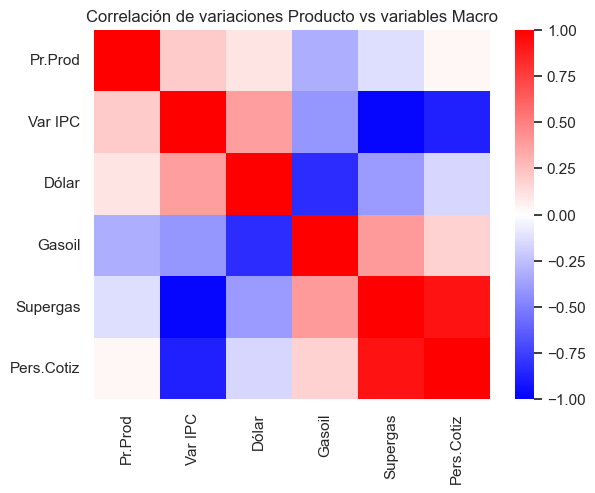

In [130]:
# Desafio 3: intento de ver graficamente correlacion de variables
### En rojo mayor relación (excluyendo la diagona que se trata del mismo producto). Así por ejemplo se mostraría una baja correlación entre el IPC y el valor del supergas, en principio parece lógico ya que este producto es reiteradamente intervenido (subsidiado)

df_PreciosMayor3 = df_PreciosAgrupaP3_Fil.loc[:, ['Pre_Var', 'Ind_Var12', 'id_3501','id_3003','id_3004','id_6001']]
df_PreciosMayor3 = df_PreciosMayor3.rename(columns={
    'Pre_Var': 'Pr.Prod',
    'Ind_Var12': 'Var IPC',
    'id_3501': 'Dólar',
    'id_3003': 'Gasoil',
    'id_3004': 'Supergas',
    'id_6001': 'Pers.Cotiz'
})
ax = sns.heatmap(df_PreciosMayor3.corr(), cmap='bwr', vmin=-1, vmax=1)
ax.set_title("Correlación de variaciones Producto vs variables Macro")
plt.show()


<small>Otra óptica entre distintas variables macro y variación de productos analizados</small>

In [131]:
del df_PreciosMayor3    # libera memoria

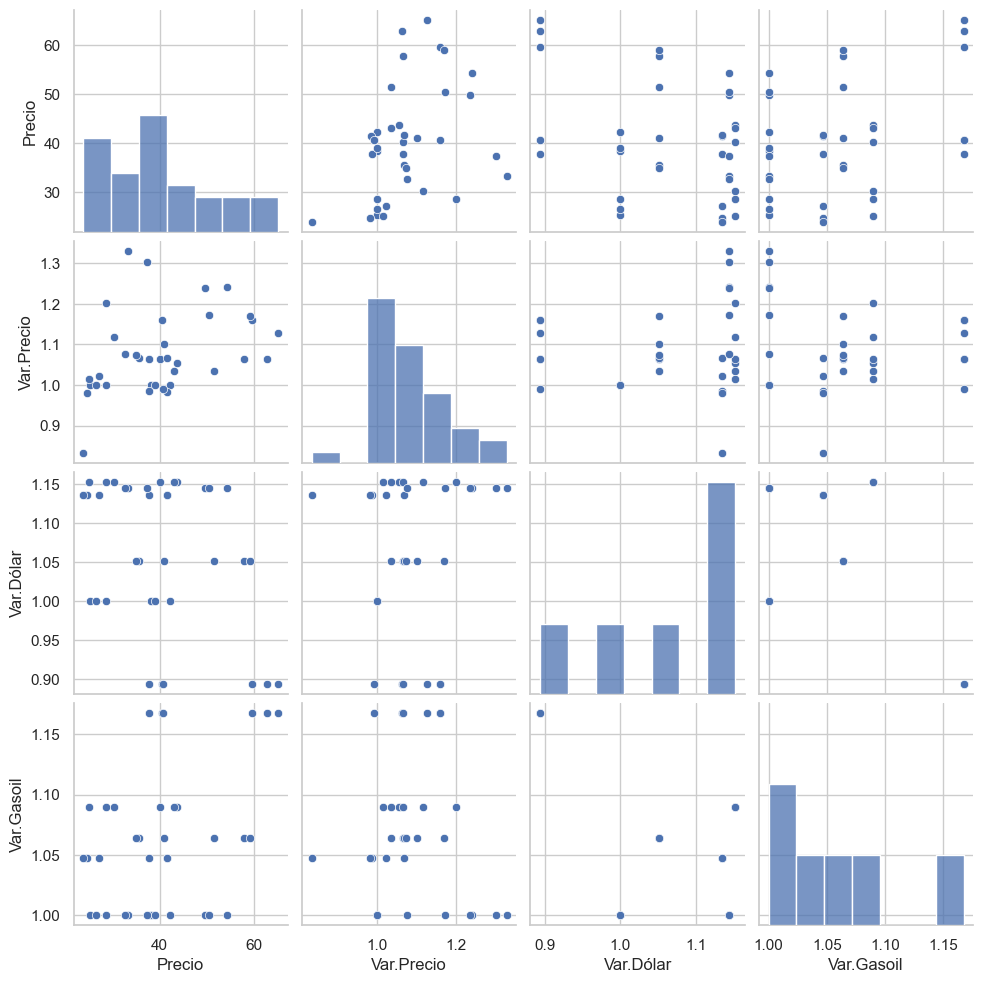

In [132]:
#### Analisis a gusto del operador, se elige productos y variables especiales
columnas_deseadas = {
    "Precio": "Precio",
    "Pre_Var": "Var.Precio",
    "id_3501": "Var.Dólar",
    "id_3003": "Var.Gasoil"
}
df_Filtrado = df_PreciosAgrupaP2[(df_PreciosAgrupaP2["PrEsp"] == False) & (df_PreciosAgrupaP2["Subclase"] == "01111")]
df_seleccionado = df_Filtrado.rename(columns=columnas_deseadas)[list(columnas_deseadas.values())]

sns.pairplot(df_seleccionado)

## Analisis de ESTABLECIMIENTOS (sin considerar PRODUCTOS)

<small>(Respuesta pregunta 3)</small>

In [133]:
### Analisis de Establecimientos (excluye Productos individuales)
if v_TipoEjecuta != "X":

    df_EstabFiltrado = df_PreciosAgrupa[df_PreciosAgrupa['Cod_AnoMes'].isin(v_AnoMes_Filtro)]
    if len(v_EjecEstab) > 0:
        df_EstabFiltrado = df_EstabFiltrado[df_EstabFiltrado['id_Estab'].isin(v_EjecEstab)]

    ### Creo un código único (pero temporal) a fin de ordenar el dataset, en base a establecimiento y producto, necesario para el próximo cálculo
    df_EstabFiltrado = df_EstabFiltrado.assign(id_EstPro=df_EstabFiltrado['id_Estab'] * 1000 + df_EstabFiltrado['id_Producto']) # el método assign no sustituye el DF original
    df_EstabFiltrado.sort_values(['id_EstPro', 'Cod_AnoMes'], inplace=True)

    ### Reduce tamaño de DF de establecimientos
    tmp_col_elimina = ['razon.social', 'nombre.sucursal', 'direccion', 'ccz', 'cajas', 'long','lat', 'depto', 'id.depto', 'localidad']
    df_Establecimientos_Reducido = df_Establecimientos.drop(tmp_col_elimina, axis=1)

    df_EstabAgrupa = pd.merge(df_EstabFiltrado, df_Establecimientos_Reducido, on='id_Estab')

    df_EstabAgrupa.sort_values(['id_EstPro', 'Cod_AnoMes'], inplace=True)
    ### Variación interperiodo (puede ser 1, 2, 3 ...)
    df_EstabAgrupa['Pre_Var'] = df_EstabAgrupa.groupby(['id_EstPro'])['Precio'].pct_change(periods=1) * 100

    ### Promedio por establecimiento
    df_EstabAgrupa_E = df_EstabAgrupa.groupby(['id_Estab', 'Cod_AnoMes', 'barrio','cadena', 'ciudad']).agg({'Pre_Var': 'mean'}).reset_index()
    ####df_EstabAgrupa_E.rename(columns={'Pre_Var01': 'Pre_Var01', 'Pre_Var12': 'Pre_Var12P'}, inplace=True)

    ### Promedio por barrio
    df_EstabAgrupa_B = df_EstabAgrupa.groupby(['Cod_AnoMes', 'barrio', 'ciudad']).agg({'Pre_Var': 'mean'}).reset_index()
    ####df_EstabAgrupa_B.rename(columns={'Pre_Var01': 'Pre_Var01', 'Pre_Var12': 'Pre_Var12P'}, inplace=True)

    ### Promedio por Ciudad
    df_EstabAgrupa_C = df_EstabAgrupa.groupby(['ciudad', 'Cod_AnoMes']).agg({'Pre_Var': 'mean'}).reset_index()

    #df_EstabAgrupa.sort_values(['ciudad','Cod_AnoMes'], inplace=True)
    #df_EstabAgrupa_C = df_EstabAgrupa.groupby(['ciudad', 'Cod_AnoMes']).agg({'Pre_Var': 'mean'}).reset_index()
    ####df_EstabAgrupa_C.rename(columns={'Pre_Var01': 'Pre_Var01', 'Pre_Var12': 'Pre_Var12P'}, inplace=True)


In [134]:
del df_EstabAgrupa_B, df_EstabAgrupa_C, df_EstabAgrupa_E  # libera memoria

,id_Estab,cadena,ciudad,barrio,Pre_Var12Acum,Ind_Var12Acum,enum
147,171,Ta - Ta,Montevideo,Centro,201.895984,39.157392,1
211,264,Sin Cadena,Montevideo,Piedras Blancas,168.677108,50.233351,2
6,12,El Clon,Montevideo,Cerro,150.850634,50.233351,3
224,289,Super XXI,Ciudad de la Costa,Interior,146.839004,50.233351,4
225,291,Super XXI,Ciudad de la Costa,Interior,146.839004,50.233351,5
226,292,Super XXI,Ciudad de la Costa,Interior,146.839004,50.233351,6
7,13,El Clon,Montevideo,Cordón,142.294388,50.233351,7
90,104,Ta - Ta,Montevideo,Cordón,139.579915,39.157392,8
210,262,Sin Cadena,Montevideo,Toledo Chico,133.201423,50.233351,9
249,338,Sin Cadena,Montevideo,Cordón,130.646137,50.233351,10


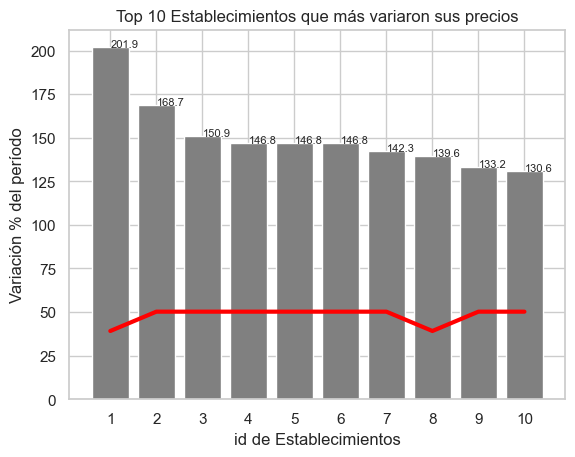

In [135]:
### Análisis de Establecimiento, excluye 'Producto'
if v_TipoEjecuta != "X":

    df_EstabFiltrado = df_PreciosAgrupa[df_PreciosAgrupa['Cod_AnoMes'].isin(v_AnoMes_Filtro)]
    
    ### Cálculo de variaciones por producto y Año/Mes sin importar el producto
    df_EstabFiltrado = df_EstabFiltrado.groupby(['id_Estab', 'Año', 'Mes','Cod_AnoMes', 'PrEsp'])['Precio'].mean().reset_index()
    df_EstabFiltrado['Pre_Var'] = df_EstabFiltrado.groupby(['id_Estab'])['Precio'].pct_change(periods=1) * 100
    df_EstabFiltrado['Pre_Var'] = df_EstabFiltrado['Pre_Var'].apply(lambda x: (x / 100) + 1)  ### Convierto en % la variable

    ### Crea DF base para trabajo posterior
    df_PreciosAgrupaE = pd.merge(df_EstabFiltrado, df_ipcGral_red, on='Cod_AnoMes')
    df_PreciosAgrupaE['Ind_Var12'] = df_PreciosAgrupaE['Ind_Var12'].apply(lambda x: (x / 100) + 1)  ### Convierto en % la variable

    ### El primer indice lo hago = 1 para ver evolución
    v_Indice1 = v_AnoMes_Filtro[0]   # Guardo el primer año
    df_PreciosAgrupaE.loc[df_PreciosAgrupaE["Cod_AnoMes"] == v_Indice1, "Ind_Var12"] = 1
    df_PreciosAgrupaE.loc[df_PreciosAgrupaE["Cod_AnoMes"] == v_Indice1, "Pre_Var"] = 1

    df_PreciosAgrupaE.sort_values(['id_Estab', 'Cod_AnoMes'], inplace=True)
    df_PreciosAgrupaE['Pre_Var12Acum'] = df_PreciosAgrupaE.groupby(['id_Estab'])['Pre_Var'].cumprod()
    df_PreciosAgrupaE['Ind_Var12Acum'] = df_PreciosAgrupaE.groupby(['id_Estab'])['Ind_Var12'].cumprod()   # Indicador acumulado

df_PreciosAgrupaE.replace([np.inf, -np.inf], np.nan, inplace=True) # evita errores al dividir por cero en el dataframe

df_PreciosAgrupaE = pd.merge(df_PreciosAgrupaE, df_Establecimientos_Reducido, on='id_Estab', how='left')


### Establecimientos
df_PreciosAgrupaE_Periodo = df_PreciosAgrupaE[df_PreciosAgrupaE['Cod_AnoMes'].isin(v_AnoMes_Ultimo)]  # v_AnoMes_FiltroR
df_PreciosAgrupaE_Periodo = df_PreciosAgrupaE_Periodo.groupby(['id_Estab', 'cadena' , 'ciudad' , 'barrio']).agg({'Pre_Var12Acum': lambda x: (x.mean(skipna=True)-1)*100, 'Ind_Var12Acum': lambda x: (x.mean(skipna=True)-1)*100}).reset_index() # lo paso a % para graficar

df_PreciosAgrupaE_Periodo_G = df_PreciosAgrupaE_Periodo.sort_values('Pre_Var12Acum' , ascending=False)
df_PreciosAgrupaE_Periodo_G = df_PreciosAgrupaE_Periodo_G.head(10)
df_PreciosAgrupaE_Periodo_G['enum'] = list(range(1,11)) # id_Estab distorsiona gráfica en el eje X

plt.bar(df_PreciosAgrupaE_Periodo_G['enum'], df_PreciosAgrupaE_Periodo_G['Pre_Var12Acum'], color="grey")
plt.xticks(df_PreciosAgrupaE_Periodo_G['enum'])
#plt.tight_layout()

plt.xlabel('id de Establecimientos')
plt.ylabel('Variación % del período')
plt.title('Top 10 Establecimientos que más variaron sus precios')

for i in range(len(df_PreciosAgrupaE_Periodo_G)):
    plt.text(df_PreciosAgrupaE_Periodo_G['enum'].iloc[i], df_PreciosAgrupaE_Periodo_G['Pre_Var12Acum'].iloc[i], round(df_PreciosAgrupaE_Periodo_G['Pre_Var12Acum'].iloc[i],1), fontsize=8)

# Agrega la línea fija de inflación
x = df_PreciosAgrupaE_Periodo_G['enum']
y = df_PreciosAgrupaE_Periodo_G['Ind_Var12Acum']
plt.plot(x, y, linestyle='-', linewidth=3, color='red')

plt.show
df_PreciosAgrupaE_Periodo_G.head(10)


<function matplotlib.pyplot.show(close=None, block=None)>

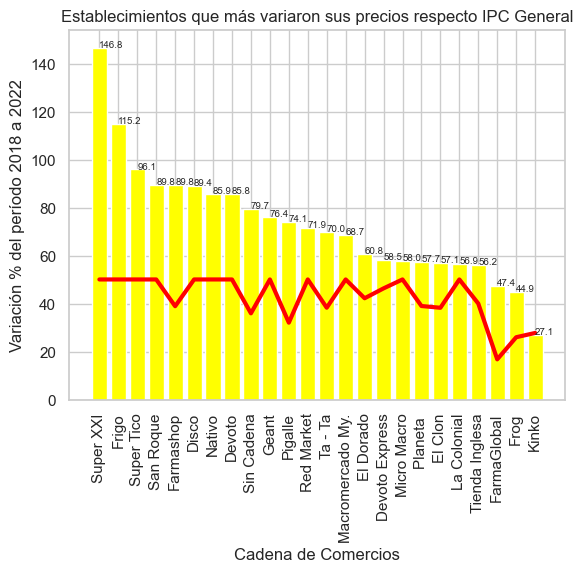

In [136]:
### Subgrupo 'cadena' de comercios
df_PreciosAgrupaEcad_Periodo_G = df_PreciosAgrupaE_Periodo.groupby(['cadena']).agg({'Pre_Var12Acum': 'mean', 'Ind_Var12Acum': 'mean'}).reset_index()
df_PreciosAgrupaEcad_Periodo_G = df_PreciosAgrupaEcad_Periodo_G.sort_values('Pre_Var12Acum' , ascending=False)
df_PreciosAgrupaEcad_Periodo_G = df_PreciosAgrupaEcad_Periodo_G.dropna()

plt.bar(df_PreciosAgrupaEcad_Periodo_G['cadena'], df_PreciosAgrupaEcad_Periodo_G['Pre_Var12Acum'], color="yellow")
plt.xticks(df_PreciosAgrupaEcad_Periodo_G['cadena'])
#plt.tight_layout()

# Agrega la línea fija de inflación
x = df_PreciosAgrupaEcad_Periodo_G['cadena']
y = df_PreciosAgrupaEcad_Periodo_G['Ind_Var12Acum']
plt.plot(x, y, linestyle='-', linewidth=3, color='red')

plt.xlabel('Cadena de Comercios')
plt.ylabel('Variación % del período ' + str(v_AñosContexto[1]) + ' a ' + str(v_AñosContexto[-1]))
plt.title('Establecimientos que más variaron sus precios respecto IPC General')
plt.xticks(rotation='vertical')
#plt.figure(figsize=(10, 10))

for i in range(len(df_PreciosAgrupaEcad_Periodo_G)):
    plt.text(df_PreciosAgrupaEcad_Periodo_G['cadena'].iloc[i], df_PreciosAgrupaEcad_Periodo_G['Pre_Var12Acum'].iloc[i], round(df_PreciosAgrupaEcad_Periodo_G['Pre_Var12Acum'].iloc[i],1), fontsize=7)

plt.show
#v_Ctrl_Pre12Acum = df_PreciosAgrupaEcad_Periodo_G.agg({'Pre_Var12Acum': 'mean'}).reset_index()['Pre_Var12Acum'].values


## Ciudades y su variación de precios

<small>(Respuesta pregunta 2)</small>

<function matplotlib.pyplot.show(close=None, block=None)>

d:\Programacion\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
d:\Programacion\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


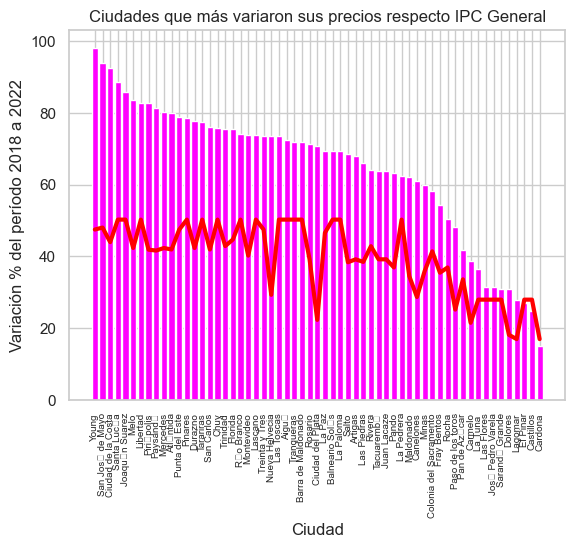

In [137]:
### Analisis del aumento de precios en el período considerado

### subgrupo 'ciudad'
df_PreciosAgrupaEciu_Periodo_G = df_PreciosAgrupaE_Periodo.groupby(['ciudad']).agg({'Pre_Var12Acum': 'mean', 'Ind_Var12Acum': 'mean'}).reset_index()

df_PreciosAgrupaEciu_Periodo_G = df_PreciosAgrupaEciu_Periodo_G.sort_values('Pre_Var12Acum' , ascending=False)
df_PreciosAgrupaEciu_Periodo_G= df_PreciosAgrupaEciu_Periodo_G.dropna()

plt.bar(df_PreciosAgrupaEciu_Periodo_G['ciudad'], df_PreciosAgrupaEciu_Periodo_G['Pre_Var12Acum'], color="magenta")
plt.xticks(df_PreciosAgrupaEciu_Periodo_G['ciudad'])
#plt.tight_layout()

# Agrega la línea fija con IPC General
x = df_PreciosAgrupaEciu_Periodo_G['ciudad']
y = df_PreciosAgrupaEciu_Periodo_G['Ind_Var12Acum']
plt.plot(x, y, linestyle='-', linewidth=3, color='red')

plt.xlabel('Ciudad')
plt.ylabel('Variación % del período ' + str(v_AñosContexto[1]) + ' a ' + str(v_AñosContexto[-1]))
plt.title('Ciudades que más variaron sus precios respecto IPC General')
plt.xticks(rotation='vertical')
plt.xticks(fontsize=7)
plt.show

In [138]:
del df_PreciosAgrupaEciu_Periodo_G  # libera memoria

#### Cadenas de Comercios y sus variaciones de precios

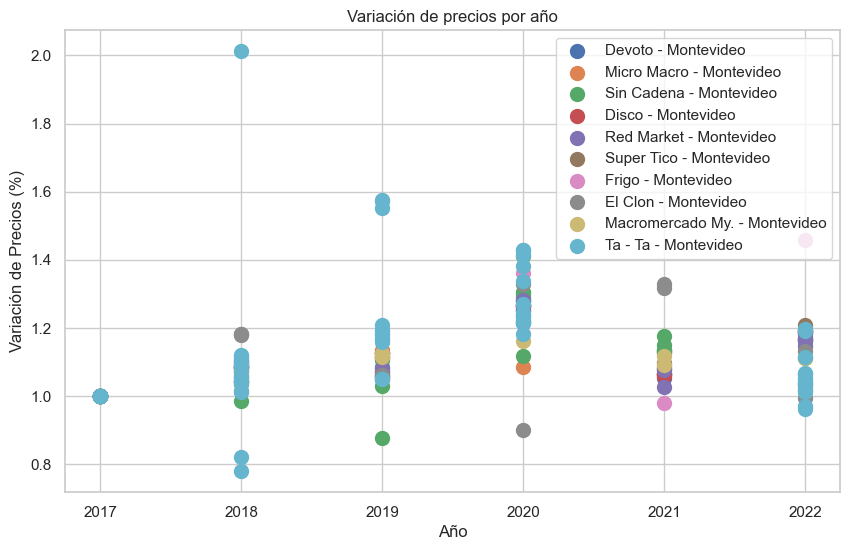

In [139]:
# Analisis de la suba de precios por cadena

### Para reducir el df solamente los secc no vacíos
df_PreciosAgrupa_A1 = df_PreciosAgrupaE[(df_PreciosAgrupaE['secc'].notna())] #& (df_PreciosAgrupaE['Cod_AnoMes'].isin(v_AnoMes_Ultimo))]
precios = df_PreciosAgrupa_A1['Pre_Var']
comercio = df_PreciosAgrupa_A1['cadena']
año = df_PreciosAgrupa_A1['Año']
ciudad = df_PreciosAgrupa_A1['ciudad']

# Creo una lista de colores únicos para los comercios
colores_comercio = list(set(comercio))

# Creo una lista de colores únicos para ciudad
colores_tipo_producto = list(set(ciudad))

# Creo el gráfico de dispersión
plt.figure(figsize=(10, 6))
for i, comercio_uniq in enumerate(colores_comercio):
    for j, ciudad_uniq in enumerate(colores_tipo_producto):
        # Filtrar los datos por comercio y tipo de producto
        filtro = (comercio == comercio_uniq) #& (ciudad == ciudad_uniq)
        precios_filtrados = precios[filtro]
        año_filtrado = año[filtro]
        
        # Graficar los puntos de datos con el color correspondiente
        plt.scatter(año_filtrado, precios_filtrados, label=str(comercio_uniq) + ' - ' + str(ciudad_uniq), s=100, alpha=1)

plt.xlabel('Año')
plt.ylabel('Variación de Precios (%)')
plt.title('Variación de precios por año')
plt.legend()
plt.show()


In [140]:
del df_PreciosAgrupa_A1   # Libera memoria
del precios, comercio, año, ciudad

## Analisis Encuesta Continua de Hogares (ECH) del INE
<small>
Publicado mensualmente, unos 23.000 hogares anuales (2022) que abarca a unas 55.000 personas, cuestionario general con más de 500 variables (preguntas)
</small>


[Ver sitio web](https://www.gub.uy/instituto-nacional-estadistica/datos-y-estadisticas/encuestas/encuesta-continua-hogares)


In [141]:
### Agrego secciones Censales según último censo (2011)

#lista_seccionesCensales = df_Establecimientos['secc'].dropna().unique().tolist()
#lista_seccionesCensales

df_PreciosAgrupaECH = df_PreciosAgrupaE[(df_PreciosAgrupaE['secc'].notna()) & (df_PreciosAgrupaE['Cod_AnoMes'].isin(v_AnoMes_Ultimo))]

df_PreciosAgrupaECH_Seccion = df_PreciosAgrupaECH.groupby(['secc','test' ])[['Pre_Var12Acum', 'Ind_Var12Acum']].mean().reset_index()
df_PreciosAgrupaECH_Seccion['secc'] = round(df_PreciosAgrupaECH_Seccion['secc']).astype(int)

# Creo categorias según incremento de precios para cada seccion censal, divido en 3 categorias de incremento (bajo/medio/alto)
df_PreciosAgrupaECH_Seccion['secc_Categ'] = pd.qcut(df_PreciosAgrupaECH_Seccion['Pre_Var12Acum'], q=3, labels=[-1, 0, 1])

### El DF es muy grande, extraigo algunas variables de interés
col_deseadas = ['ID' , 'nper', 'anio', 'mes', 'dpto', 'ccz', 'secc', 'segm', 'barrio', 'e186_1', 'd8_1', 'd8_2', 'd8_3', 'd8_4', 'eg_ps3','estred13','eg_ahorro','eg_ps1','eg_ps2','eg_ps3', 'ht11']
#e186_1: cantidad de hijos que viven en el hogar
#d8_1: si es propietario
#d8_2: Monto compra terreno o vivienda
#d8_3: Monto de alquiler
#d8_4: ubicada en asentamiento irregular
#eg_ps1: si considera que su hogar es pobre
#eg_ps2: monto mínimo mensual para cubrir necesidades básicas
#eg_ps3: gasto en alimentos, suficiente o no
#ht11: Ingreso total del hogar
#secc: se refiere a la sección geográfica censal
#segm: se refiere al segmento geográfico censal

# estred13: nivel socioeconómico
diccionario_estred13 = {
    1: 'Mvd-N/E bajo',
    2: 'Mvd-N/E medio-bajo',
    3: 'Mvd-N/E medio',
    4: 'Mvd-N/E medio-alto',
    5: 'Mvd-N/E alto',
    6: 'Zona Metropolitana',
    7: 'Int.N.:Art,Riv,C.La,Tr.yT',
    8: 'Costa Este:Can,Mal,Roc)',
    9: 'Lit.N.:Sal,Pays,R.Negro',
    10: 'Lit.Sur:Sor,Col,S.José)',
    11: 'Cen.N.:Tac,Dur',
    12: 'Cen.S.:F/res,F/ida,Lav'
}

#eg_ahorro: en el mes anterior, los ingresos del hogar
diccionario_eg_ahorro = {
    1: 'alcanzaron y pudo ahorrar',
    2: 'alcanzaron pero no ahorró',
    3: 'no alcanzaron y des-ahorró',
    4: 'no alcanzaron y pidió prestado',
    5: 'no alcanzaron y recibió apoyo',
    6: 'no alcanzaron y quedaron ctas impagas',
}

#eg_ps1: considera que su hogar es pobre
diccionario_eg_ps1 = {
    1: 'Si',
    2: 'No',
}

#v_ruta3 = "D:\Serprivado\Proyectos\DataScience_CoderHouse_datos3"
v_ruta3 = v_ruta
df_Encuesta = pd.read_csv(v_ruta3 +'\ECH_2022.csv', sep=';', encoding='utf-8', usecols=col_deseadas)

df_Encuesta['ht11'] = df_Encuesta['ht11'].str.replace(' ','')
df_Encuesta['ht11'] = df_Encuesta['ht11'].str.replace(',','.')
df_Encuesta['ht11'] = pd.to_numeric(df_Encuesta['ht11'], errors='coerce')


C:\Users\sloti\AppData\Local\Temp\ipykernel_4188\2479701676.py:62: DtypeWarning: Columns (503) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Encuesta = pd.read_csv(v_ruta3 +'\ECH_2022.csv', sep=';', encoding='utf-8', usecols=col_deseadas)


In [142]:
# Construyo DF con la cantidad de personas por hogar y no con el dato de c/u
idx = df_Encuesta.groupby('ID')['nper'].idxmax()

# Selecciono las filas correspondientes a los índices encontrados
df_EncuestaH = df_Encuesta.loc[idx]
del idx # libero memoria

df_EncuestaH_ok_ht11 = df_EncuestaH
df_EncuestaH_ok_ht11 = df_EncuestaH_ok_ht11.dropna(subset=['ht11'])


In [143]:
df_PreciosAgrupaECH_Seccion

,secc,test,Pre_Var12Acum,Ind_Var12Acum,secc_Categ
0,1,False,2.471991,1.446954,1
1,4,False,1.736687,1.435878,-1
2,5,False,1.849302,1.428494,0
3,6,False,2.087766,1.502334,1
4,7,False,1.847852,1.428494,0
5,13,False,1.794029,1.391158,0
6,16,False,1.700573,1.486511,-1
7,19,False,1.780417,1.446954,-1
8,23,True,1.909034,1.502334,1
9,99,False,1.786295,1.480182,-1


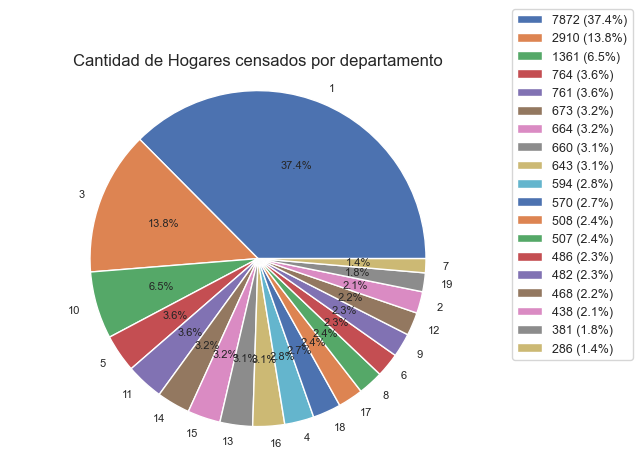

In [144]:
lineas_por_dpto = df_EncuestaH['dpto'].value_counts()

# Creo un gráfico de torta para visualizar cuantos hogares hay por departamento
fig, ax = plt.subplots()
ax.pie(lineas_por_dpto, labels=lineas_por_dpto.index, autopct='%1.1f%%', textprops={'fontsize': 8})
ax.axis('equal')  # Hace que el gráfico sea circular
ax.set_title('Cantidad de Hogares censados por departamento')

# Agrego las cantidades en el gráfico
total_lineas = lineas_por_dpto.sum()
label_cantidades = [f'{c} ({c/total_lineas*100:.1f}%)' for c in lineas_por_dpto]
ax.legend(label_cantidades, loc='center left', bbox_to_anchor=(1, 0.7), fontsize=9)

plt.show()

<small>Dataframes importantes:
<br>
> df_Encuesta: contiene el dato de cada persona
<br>
> df_EncuestaH: no contiene el dato de cada persona pero si de la cantidad
<br>
df_PreciosAgrupaECH_Seccion: variación de precios por Seccion Censal
</small>

<small>Visualización de la cantidad de encuestas mensuales, aunque se tomaran a nivel anual</small>

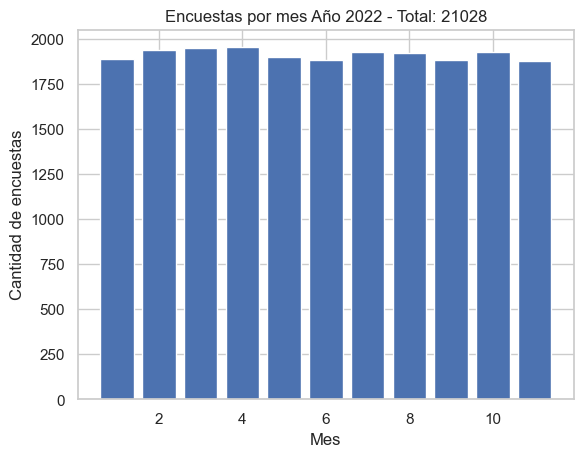

In [145]:
df_Encuesta_mes = df_EncuestaH.groupby('mes')['ID'].nunique().reset_index()
v_Cant_EncUnica = df_Encuesta_mes['ID'].sum()
v_Cant_Personas = df_Encuesta['ID'].count()

plt.bar(df_Encuesta_mes['mes'], df_Encuesta_mes['ID'])
plt.xlabel('Mes')
plt.ylabel('Cantidad de encuestas')
plt.title('Encuestas por mes Año 2022 - Total: ' +str(v_Cant_EncUnica))
plt.show()

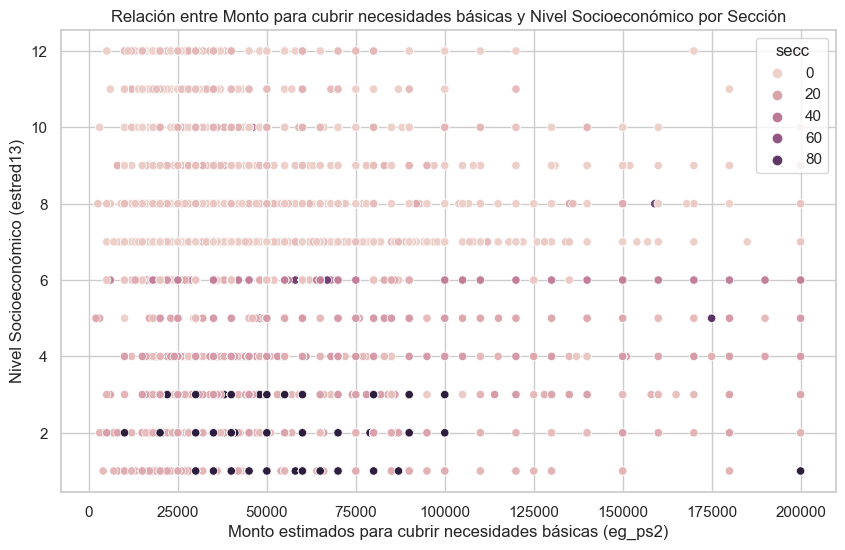

In [146]:
plt.figure(figsize=(10, 6))

# excluyo valores muy atipicos y que no son lógicos ya que se refiere a necesitades básicas
df_EncuestaH_Graf = df_EncuestaH[(df_EncuestaH['eg_ps2'] > 1000) & (df_EncuestaH['eg_ps2'] < 200001)] # & (df_EncuestaH['dpto'] == 1)]

valores_excluidos = len(df_EncuestaH) - len(df_EncuestaH_Graf)

sns.scatterplot(data=df_EncuestaH_Graf, x='eg_ps2', y='estred13', hue='secc')
plt.xlabel('Monto estimados para cubrir necesidades básicas (eg_ps2)')
plt.ylabel('Nivel Socioeconómico (estred13)')
plt.title('Relación entre Monto para cubrir necesidades básicas y Nivel Socioeconómico por Sección')
#plt.xlim(df_EncuestaH_Graf['eg_ps2'].min(), df_EncuestaH_Graf['eg_ps2'].max())
plt.show()

↑↑↑ <small>Montevideo: Los niveles socioeconomicos van de 1=bajo a 5=alto <br>
</snmall>

In [147]:
valores_excluidos

176

↑↑↑ <small>Valores excluidos no son significativos</snmall>

Text(0.5, 1.0, 'Distribución normal de Hogares excluidos "atípicos"')

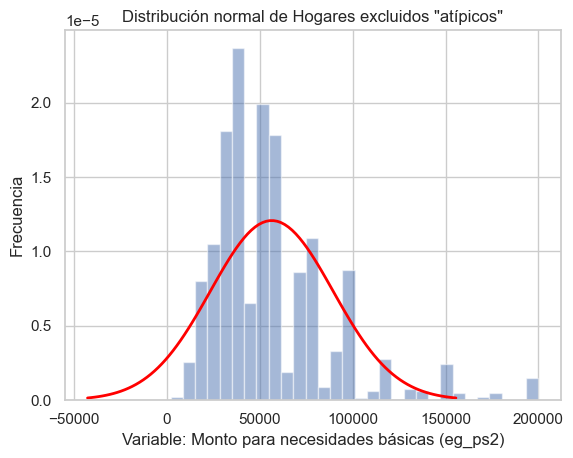

In [148]:
# Creo gráfica de dispersión para entender el DF

plt.hist(df_EncuestaH_Graf['eg_ps2'], bins=30, density=True, alpha=0.5)

mu = df_EncuestaH_Graf['eg_ps2'].mean()  # calculo de la media
sigma = df_EncuestaH_Graf['eg_ps2'].std()  # Calculo de la desviación standard
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)  # array de 100 puntos equidistantes
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', linewidth=2)

plt.xlabel('Variable: Monto para necesidades básicas (eg_ps2)')
plt.ylabel('Frecuencia')
plt.title('Distribución normal de Hogares excluidos "atípicos"')

Text(0.5, 1.0, 'Distribución normal de la totalidad de Hogares')

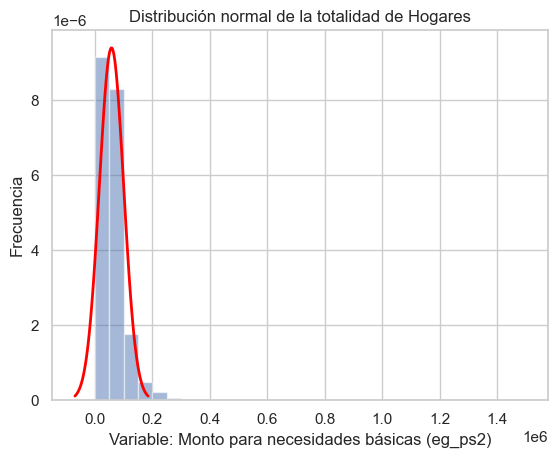

In [149]:
# Creo gráfica con todo el DF sólo para constatar los valores atipiocos como distorsionan la grafica

plt.hist(df_EncuestaH['eg_ps2'], bins=30, density=True, alpha=0.5)

mu = df_EncuestaH['eg_ps2'].mean()
sigma = df_EncuestaH['eg_ps2'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', linewidth=2)

plt.xlabel('Variable: Monto para necesidades básicas (eg_ps2)')
plt.ylabel('Frecuencia')
plt.title('Distribución normal de la totalidad de Hogares')

<Figure size 1000x600 with 0 Axes>

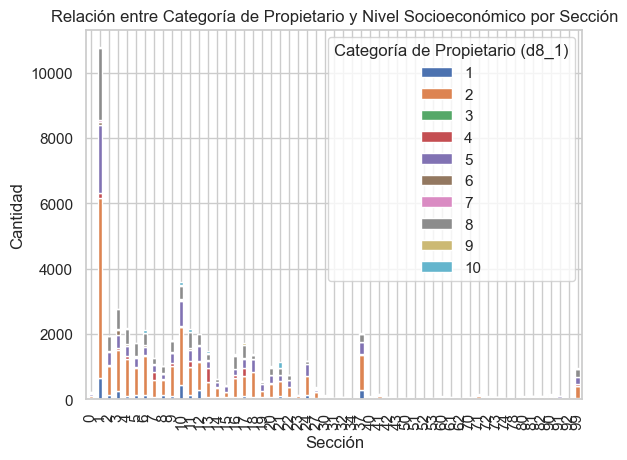

In [150]:
plt.figure(figsize=(10, 6))
df_grouped = df_Encuesta.groupby(['secc', 'd8_1'])['estred13'].count().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Sección')
plt.ylabel('Cantidad')
plt.title('Relación entre Categoría de Propietario y Nivel Socioeconómico por Sección')
plt.legend(title='Categoría de Propietario (d8_1)', loc='upper right')
plt.show()

In [151]:
del df_grouped  # libera memoria

#### Cruce con información Geográfica

In [152]:

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import haversine_distances
from math import radians
from PIL import Image

↓↓↓ <small>MAPA: La siguiente imagen representa el trabajo de preparación de data que tuve que hacer.
El indice de comercios de la Oficina de Defensa del Consumidor me traia las coordenadas XY de cada comercio, pero no podía cruzarlo con la información de Secciones y Segmentos censales usadas por el INE. De ahí que cargue en Google Earth ambas informaciones y a "ojimetro" estoy armando un excel donde mapeo una columna es la Seccion del INE y en otra columna el id del establecimiento según el mapa abajo.
</small>

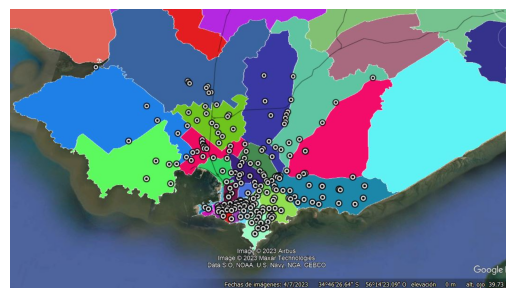

In [153]:
ruta_imagenMVD = v_ruta + '/mvd_infoGeografica.jpg'
imagen = Image.open(ruta_imagenMVD)
plt.imshow(imagen)
plt.axis('off')  # Opcional: ocultar los ejes
plt.show()

d:\Programacion\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sloti\AppData\Local\Temp\ipykernel_4188\1906591688.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EstablecimientosXY['cluster'] = kmeans.fit_predict(dist_matrix)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


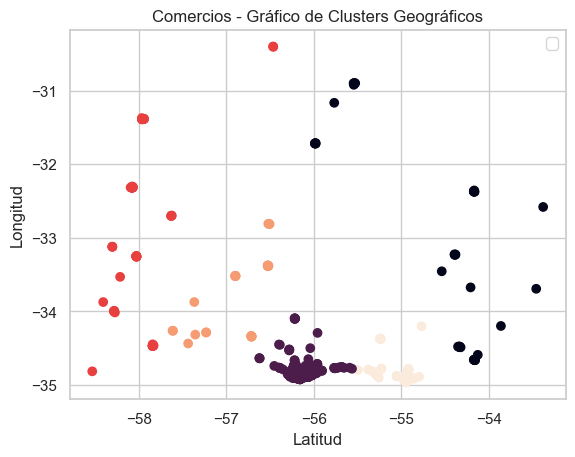

In [154]:
df_EstablecimientosXY = df_Establecimientos.dropna(subset=['long', 'lat'])

# Creo una matriz de distancia utilizando la fórmula de Haversine (digamos diagonal)
dist_matrix = haversine_distances(
    df_EstablecimientosXY[['lat_rad', 'lon_rad']].values, df_EstablecimientosXY[['lat_rad', 'lon_rad']].values
) * 6371  # esto lo convierte a kilómetros (es el radio de la tierra)

# Aplicar el algoritmo de K-means para agrupar los comercios según su ubicación
kmeans = KMeans(n_clusters=6, random_state=42)
df_EstablecimientosXY['cluster'] = kmeans.fit_predict(dist_matrix)

plt.scatter(df_EstablecimientosXY['lat'], df_EstablecimientosXY['long'], c=df_EstablecimientosXY['cluster'])
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Comercios - Gráfico de Clusters Geográficos')
plt.legend()
plt.show()


d:\Programacion\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sloti\AppData\Local\Temp\ipykernel_4188\809244160.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EstablecimientosXY2['cluster'] = kmeans.fit_predict(dist_matrix)


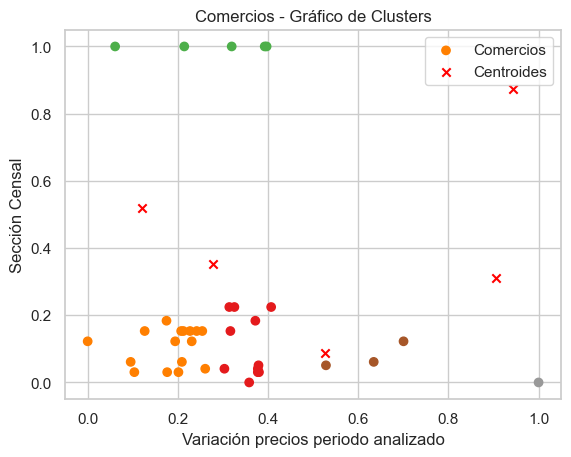

In [155]:
from scipy.spatial.distance import correlation
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler


df_EstablecimientosXY2 = df_PreciosAgrupaECH[['Pre_Var12Acum', 'secc']]

### Normalizo:
scaler = MinMaxScaler()   # Creo una instancia del objeto MinMaxScaler
df_EstablecimientosXY2.loc[:, ['Pre_Var12Acum', 'secc']] = scaler.fit_transform(df_EstablecimientosXY2[['Pre_Var12Acum', 'secc']])

# Creo una matriz de distancia utilizando la fórmula de Haversine
dist_matrix = haversine_distances(df_EstablecimientosXY2) 

# Aplico el algoritmo de K-means para agrupar los comercios según sus precios
kmeans = KMeans(n_clusters=5, random_state=42)
df_EstablecimientosXY2['cluster'] = kmeans.fit_predict(dist_matrix)

centroids = kmeans.cluster_centers_    # Obtengo los centroides de los clusters

# Grafico los puntos de los comercios
plt.scatter(df_EstablecimientosXY2['Pre_Var12Acum'], df_EstablecimientosXY2['secc'], c=df_EstablecimientosXY2['cluster'], label='Comercios', cmap='Set1') #Set1=gama de colores

# Grafico los centroides de los clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroides')

plt.xlabel('Variación precios periodo analizado')
plt.ylabel('Sección Censal')
plt.title('Comercios - Gráfico de Clusters')
plt.legend()
plt.show()


<small>(En análisis)
El último gráfico no salió como esperaba, en análisis ...
</small>

In [156]:
del df_EstablecimientosXY, df_EstablecimientosXY2   # libera memoria

## Cruce ECH vs Incremento de Precios

In [157]:
df_EncuestaH_p2 = pd.merge(df_EncuestaH, df_PreciosAgrupaECH_Seccion, on='secc', how='left')

#df_EncuestaH_p2.replace(to_replace=None, value=np.nan, inplace=True)

df_EncuestaH_p2['secc_Categ'] = pd.to_numeric(df_EncuestaH_p2['secc_Categ'], errors='coerce')
df_EncuestaH_p2['secc_Categ'] = df_EncuestaH_p2['secc_Categ'].astype('Int64')

# Sustiyo True por 1, False por 0 y NaN por 0 para tener todos los campos num
df_EncuestaH_p2['test'] = df_EncuestaH_p2['test'].replace({True: 1, False: 0, np.nan: 0})
df_EncuestaH_p2['test'] = df_EncuestaH_p2['test'].astype('int64')

# solo secciones censales mapeadas
df_EncuestaH_p2b = df_EncuestaH_p2.dropna(subset=['secc_Categ']).dropna()



## Reducción de dimensionalidad

In [158]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score # para evaluar clusterización
from sklearn.model_selection import train_test_split # separa datos para test

### Variables macroeconomicas vs Precios comercios

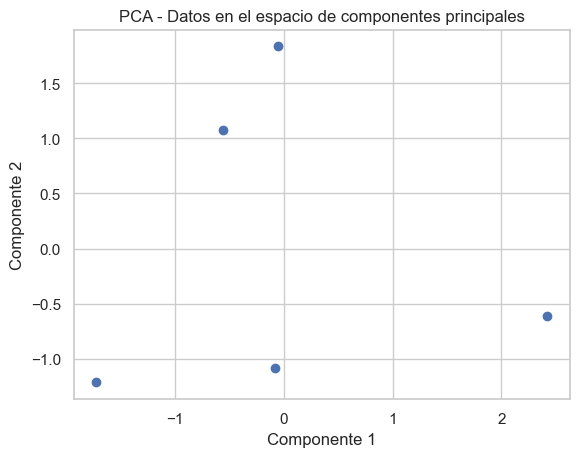

In [159]:
### Variables macroeconomicas vs Precios comercios

columnas_deseadas = {
    "Pre_Var": "Precio",
    "id_3501": "Dólar USA",
    "id_2001": "Pr.Maiz Chicago",
    "id_2002": "Pr.Soja Chicago",
    "id_3003": "Gasoil"
}
df_FiltradoTMP = df_PreciosAgrupaP2[(df_PreciosAgrupaP2["PrEsp"] == False) & (df_PreciosAgrupaP2["Subclase"] == "01151")]
df_FiltradoTMP = df_FiltradoTMP.groupby('Año')[['Pre_Var', 'id_3501', 'id_2001', 'id_2002', 'id_3003']].mean().reset_index()
v_PrimerAño = v_AñosContexto[0]
df_FiltradoTMP = df_FiltradoTMP[df_FiltradoTMP['Año'] != v_PrimerAño]

df_seleccionado = df_FiltradoTMP.rename(columns=columnas_deseadas)[list(columnas_deseadas.values())]

# Separo la variable objetivo 'Precio'
X = df_seleccionado.drop('Precio', axis=1).values
y = df_seleccionado['Precio'].values

# Estandarizo las características antes de aplicar PCA
tmp_scaler1 = StandardScaler()
X_scaled1 = tmp_scaler1.fit_transform(X)

# Aplico PCA con los componentes principales 
pca = PCA(n_components=2)  # elegí 2
X_pca = pca.fit_transform(X_scaled1)

# Creo un nuevo DataFrame con los componentes principales y el precio
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Precio'] = y

plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA - Datos en el espacio de componentes principales')
plt.show()

<small>Conclusión previa del gráfico mostrado: ↑↑↑<br>
El dato arriba mostrado indica la dispersión de variables del precio y 4 variables macro.
En principio estaría indicando que no guardan relación ya que tiene mucha dispersión de puntos. Habría que buscar otras variables<br>
Como analista de datos debería informar a la gente responsable que se deberian conseguir otras variables macro.
</small>

### Representación completa del DF (con todas las variables consideradas)

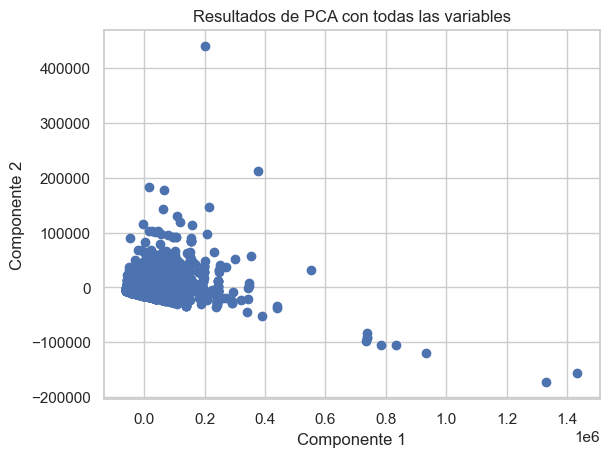

In [160]:

df_EncuestaH_p3 = df_EncuestaH_p2[['secc_Categ',  'secc', 'e186_1', 'd8_1','d8_2', 'd8_3', 'd8_4', 'eg_ps3','estred13','eg_ahorro','eg_ps1','eg_ps2','eg_ps3', 'test']]  # excluyo 'ht11' por valores nan
df_EncuestaH_p3 = df_EncuestaH_p3[df_EncuestaH_p3['test'] == 0] # No test

df_EncuestaH_p3_test = df_EncuestaH_p2[['secc_Categ',  'secc', 'e186_1', 'd8_1','d8_2', 'd8_3', 'd8_4', 'eg_ps3','estred13','eg_ahorro','eg_ps1','eg_ps2','eg_ps3', 'test']]
df_EncuestaH_p3_test = df_EncuestaH_p3_test[df_EncuestaH_p3_test['test'] == 1] # test

df_EncuestaH_p3 = df_EncuestaH_p3.fillna(0)

scaler = MinMaxScaler()  #   StandardScaler()
X_scaled = scaler.fit_transform(df_EncuestaH_p3)

# Aplico PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_EncuestaH_p3)

# Ahora creo un nuevo DataFrame con los componentes ppal. y el valor obj.
df_pca = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2'])
#df_pca['id'] = df['id']

plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Resultados de PCA con todas las variables')
plt.show()


<small>↑↑↑ Conclusión previa: hay mucha concentración lo que reflejaría una uniformidad relativa de datos. Salvo los puntos outliers que se ven el resto de la muestra sería bastente uniforme
</small>

d:\Programacion\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


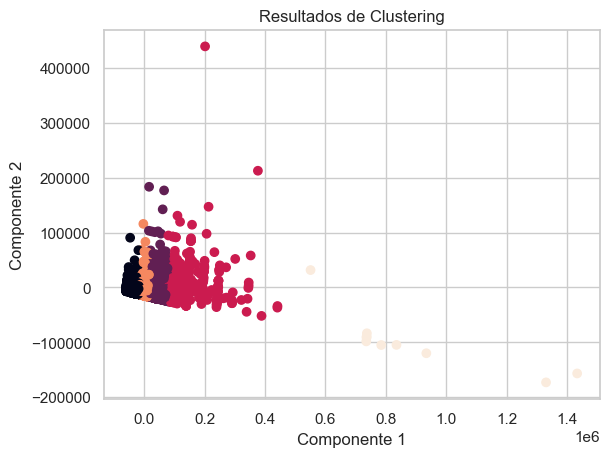

In [161]:

# Aplico el algoritmo de clusterización (K-Means)
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_pca[['Componente 1', 'Componente 2']])

# Agrego los resultados de los clusters al DataFrame 'df_pca'
df_pca['Cluster'] = clusters

plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'], c=df_pca['Cluster'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Resultados de Clustering')
plt.show()

↑↑↑ <small>Al margen de la uniformidad comentada anteriormente aplicando la clusterización se puede apreciar como sería el agrupamiento de los hogares.</small>

In [162]:
# Visualizo los cluster y la cantidad de registros por si quiero listarlos separadamente
v_cant_cluster_counts = df_pca['Cluster'].value_counts()
v_cant_cluster_counts

Cluster
0    8815
3    7543
1    3738
2     858
4      10
Name: count, dtype: int64

In [163]:
# Elijo un cluster, por ejemplo uno con pocos registros y saber cuáles son
v_clusterElegido = 2  # en este caso elijo el más disperso, supongamos quiera ver su información

l_registrosOrig = []  # lleno una list con los registros
for cluster_label in v_cant_cluster_counts.index:
    cluster_indices = df_pca[df_pca['Cluster'] == cluster_label].index
    cluster_records = df_EncuestaH_p3.loc[df_EncuestaH_p3.index.isin(cluster_indices)]
    l_registrosOrig.append(cluster_records.values.tolist())

df_ClusterElegido = df_pca[df_pca['Cluster'] == v_clusterElegido].index
df_ClusterElegidoReg = df_EncuestaH_p3.loc[df_EncuestaH_p3.index.isin(df_ClusterElegido)]
df_ClusterElegidoReg

,secc_Categ,secc,e186_1,d8_1,d8_2,d8_3,d8_4,eg_ps3,estred13,eg_ahorro,eg_ps1,eg_ps2,eg_ps3,test
22,0,7,0,1,21000.0,30000.0,2,3,3,1,2,150000,3,0
30,0,7,0,2,0.0,40000.0,2,2,4,1,2,300000,2,0
77,0,10,0,2,0.0,28000.0,2,2,5,1,2,140000,2,0
80,0,10,0,5,0.0,29000.0,2,2,5,1,2,150000,2,0
84,0,10,0,2,0.0,25000.0,2,1,5,6,2,150000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,1,1,0,1,22000.0,20000.0,2,2,9,2,2,130000,2,0
20579,1,1,0,5,0.0,18000.0,2,2,9,5,2,63000,2,0
20754,0,3,0,8,0.0,11000.0,2,2,8,1,2,40000,2,0
20757,0,3,0,2,0.0,15000.0,2,2,8,2,2,40000,2,0


Precios **secciones censales** vs categorías sobre situaicón económica del hogar *(1)*

> Pruebo aplicar k-means con menos variables ↓↓↓
<br>
<small>
Las variables:<br>
> d8_1: tipo propietario, inquilino, ocupante<br>
> d8_2: Monto cuota compra<br>
> d8_3: Monto alquiler<br>
> eg_ahorro: calidad del ahorro<br>
> estred13: estrato económico
</small>

d:\Programacion\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


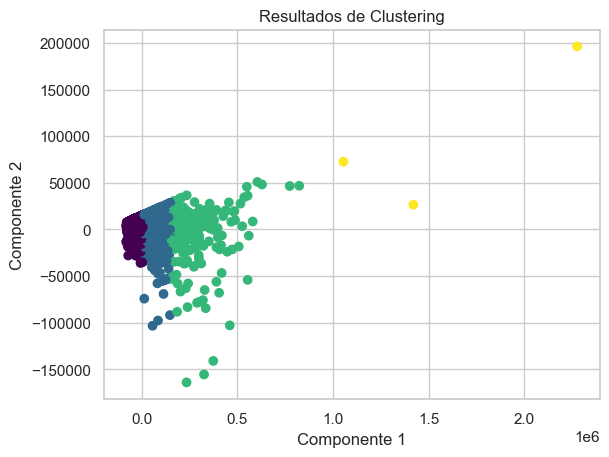

In [164]:
### Pruebo aplicar PCA y k-means con un dataset con menos variables
df_EncuestaH_p4 = df_EncuestaH_p2[[ 'secc', 'secc_Categ', 'd8_1', 'd8_2', 'd8_3', 'estred13','eg_ahorro', 'ht11' ,'test']]
df_EncuestaH_p4 = df_EncuestaH_p4.fillna(0)

df_EncuestaH_p4_filtrado = df_EncuestaH_p4[(df_EncuestaH_p4['ht11'] != 0) & (df_EncuestaH_p4['test'] == 0)]
df_EncuestaH_p4_filtrado_test = df_EncuestaH_p4[(df_EncuestaH_p4['ht11'] != 0) & (df_EncuestaH_p4['test'] == 1)]

scaler =  MinMaxScaler()  #    StandardScaler()
X_scaled = scaler.fit_transform(df_EncuestaH_p4_filtrado)

# Aplico PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_EncuestaH_p4_filtrado)

# Ahora creo un nuevo DataFrame 
df_pca = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2'])
#df_pca['id'] = df['id']

# Aplico el algoritmo de clusterización (K-Means)
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(df_pca[['Componente 1', 'Componente 2']])

# Agrego los resultados de los clusters al DataFrame 'df_pca'
df_pca['Cluster'] = clusters

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=100, label='Centroides')

plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Resultados de Clustering')
plt.show()



<small>Lo que viene, trato de evaluar los DF: ↓↓↓ <br>
Explicación del coeficiente de Silueta: va de -1 a 1.
<br>
Valores cercanos a 1 significa que la muesetra está bien clasificada entendiendose que está más cerca de los objetos de su propio grupo.
<br>
Valores cercanos a -1 significa que es una clasificación incorrecta, donde la muestra está mas cerca de los objeteos de otro grupo.
<br>
Valores cercanos a 0 significa que la muestra está cerca de la frontera entre dos grupos.
</small>

In [165]:
X_pca = df_pca[['Componente 1', 'Componente 2']].values
v_etiqueta = df_pca['Cluster'].values
silhouette_avg = silhouette_score(X_pca, v_etiqueta)
print("Coeficiente de Silueta:", silhouette_avg)

Coeficiente de Silueta: 0.6031516178601707


↑↑↑ <small>Entorno a 0.5: Interpreto una dispersión moderada
</small>

#### Compararación con Seccion "test"
<small>A efectos de comparar un grupo sección censal "test" con el resto mapeado
</small>

d:\Programacion\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


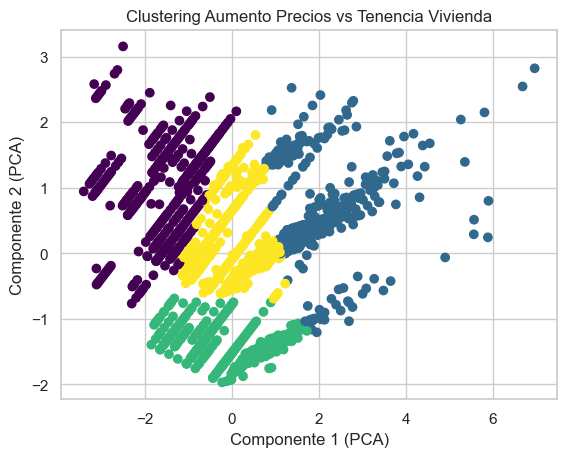

In [166]:
### Pruebo aplicar PCA y k-means con un dataset con menos variables

# secc_Categ: cuanto subió precio: poco/medio/mucho
# d8_1/2/3/4: variables de tenencia de vivienda
df_EncuestaH_p5 = df_EncuestaH_p3[[ 'secc_Categ', 'd8_1', 'd8_2', 'd8_3', 'd8_4']]
df_EncuestaH_p5_test = df_EncuestaH_p3_test[[ 'secc_Categ', 'd8_1', 'd8_2', 'd8_3', 'd8_4']]

# Elimino duplicados innecesarios para la visualizaición
df_EncuestaH_p5 = df_EncuestaH_p5.drop_duplicates(['secc_Categ', 'd8_1', 'd8_2', 'd8_3', 'd8_4'])
df_EncuestaH_p5_test = df_EncuestaH_p5_test.drop_duplicates(['secc_Categ', 'd8_1', 'd8_2', 'd8_3', 'd8_4'])

# Excluyo valores muy anomalos, excepciones o errores:
# d8_2 para la compra
# d8_3 para el alquiler
df_filtrado_Final = df_EncuestaH_p5[(df_EncuestaH_p5['d8_2'] <= 100000) & (df_EncuestaH_p5['d8_3'] <= 100000)]
df_filtrado_Final_test = df_EncuestaH_p5_test[(df_EncuestaH_p5_test['d8_2'] <= 100000) & (df_EncuestaH_p5_test['d8_3'] <= 100000)]

v_AplicaTest = False   # por ahora elijo si quiero separar para text o no
train_df, test_df = train_test_split(df_filtrado_Final, test_size=0.3, random_state=42) 

scaler = StandardScaler()   #MinMaxScaler()

if v_AplicaTest:
    X_scaled = scaler.fit_transform(train_df)
else:
   X_scaled = scaler.fit_transform(df_filtrado_Final)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Ahora creo un nuevo DataFrame con los componentes ppal. y el valor obj.
df_pca2 = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2'])

# Aplico el algoritmo de clusterización (K-Means)
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(df_pca2[['Componente 1', 'Componente 2']])

# Agrego los resultados de los clusters al DataFrame 'df_pca'
df_pca2['Cluster'] = clusters

plt.scatter(df_pca2['Componente 1'], df_pca2['Componente 2'], c=df_pca2['Cluster'], cmap='viridis')
plt.xlabel('Componente 1 (PCA)')
plt.ylabel('Componente 2 (PCA)')
plt.title('Clustering Aumento Precios vs Tenencia Vivienda')
plt.show()


↑↑↑ <small>Conclusiones previas: <br>
Ensayo separar en 4 clusters ya que tome 4 variables respecto a la tenencia de la vivienda y pruebo de esta forma.
<br>
Se puede apreciar una relativa dispersión pero cierto padron de lineas que puede marcar cierto sub agrupación.
</small>

In [167]:
del df_EncuestaH_p5, df_EncuestaH_p5_test  # limpieza memoria
del df_EncuestaH_p3, df_EncuestaH_p3_test

In [168]:
# Obtengo los componentes principales y los llevo a un array
X_pca = df_pca2[['Componente 1', 'Componente 2']].values

# Obtengo las etiquetas
v_etiqueta = df_pca2['Cluster'].values
silhouette_avg_ppal = silhouette_score(X_pca, v_etiqueta)
print("Coeficiente de Silueta:", silhouette_avg_ppal)


Coeficiente de Silueta: 0.37590755419771393


↑↑↑ <small>El valor 0,3944 significa relativa cercanía de los puntos
</small>

↓↓↓ <small>Represento el o los grupos marcados como "test"

d:\Programacion\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


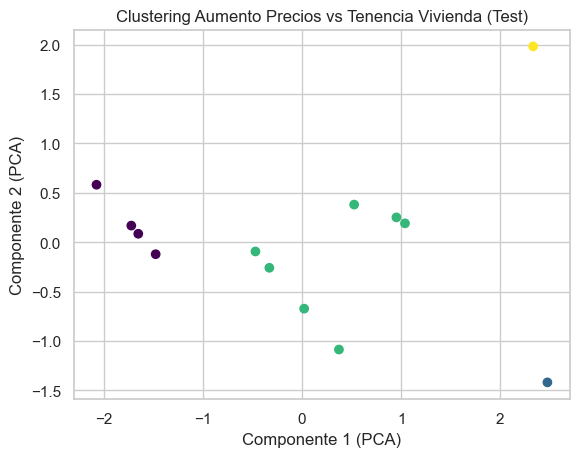

In [169]:
# Grupo marcados como "test"
X_scaled = scaler.fit_transform(df_filtrado_Final_test)
principal_components = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4)
clusters2 = kmeans.fit_predict(principal_components)

df_pca2 = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2'])
df_pca2['Cluster'] = clusters2

X_test_scaled = scaler.transform(df_filtrado_Final_test)
principal_components_test = pca.transform(X_test_scaled)
clusters_test = kmeans.predict(principal_components_test)

df_pca2_test = pd.DataFrame(data=principal_components_test, columns=['Componente 1', 'Componente 2'])
df_pca2_test['Cluster'] = clusters_test

plt.scatter(df_pca2_test['Componente 1'], df_pca2_test['Componente 2'], c=df_pca2_test['Cluster'], cmap='viridis')
plt.xlabel('Componente 1 (PCA)')
plt.ylabel('Componente 2 (PCA)')
plt.title('Clustering Aumento Precios vs Tenencia Vivienda (Test)')
plt.show()


↑↑↑ <small>El grupo marcado como test presenta mayor separación en los clusters </small>

In [170]:
# Obtengo los componentes principales y los llevo a un array
X_pca = df_pca2_test[['Componente 1', 'Componente 2']].values

# Obtengo las etiquetas
v_etiqueta = df_pca2_test['Cluster'].values
silhouette_avg_test = silhouette_score(X_pca, v_etiqueta)
print("Coeficiente de Silueta segmento test:", silhouette_avg_test)
print("Coeficiente de Silueta segmento Ppal:", silhouette_avg_ppal)


Coeficiente de Silueta segmento test: 0.47765998436978313
Coeficiente de Silueta segmento Ppal: 0.37590755419771393


↑↑↑ <small>Comparo la agrupación, en principio el segmento test parece tener una segmentación más clara y definida en comparación con el segmento principal
</small>

In [171]:
# Análisis de características para el segmento test
segmento_test = df_EncuestaH_p4[df_EncuestaH_p4['secc_Categ'] == 1]

# Obtengo estadísticas descriptivas para las características del segmento test
descripcion_segmento_test = segmento_test[['secc_Categ', 'd8_1', 'estred13', 'eg_ahorro', 'ht11']].describe()
print(descripcion_segmento_test)

# Análisis de características para el segmento principal
segmento_principal = df_EncuestaH_p4[df_EncuestaH_p4['secc_Categ'] == 0]

# Obtengo estadísticas descriptivas para las carac. del segmento principal
descripcion_segmento_principal = segmento_principal[['secc_Categ', 'd8_1', 'estred13', 'eg_ahorro', 'ht11']].describe()
print(descripcion_segmento_principal)


       secc_Categ         d8_1     estred13   eg_ahorro           ht11
count      5433.0  5433.000000  5433.000000  5433.00000    5433.000000
mean          1.0     3.832505     8.852936     2.50543   33532.205251
std           0.0     2.526137     1.877581     1.41057   50391.606224
min           1.0     1.000000     3.000000     1.00000       0.000000
25%           1.0     2.000000     7.000000     2.00000       0.000000
50%           1.0     2.000000     9.000000     2.00000       0.000000
75%           1.0     5.000000    10.000000     2.00000   54809.850000
max           1.0    10.000000    12.000000     6.00000  570096.230000
       secc_Categ          d8_1      estred13     eg_ahorro          ht11
count     13595.0  13595.000000  13595.000000  13595.000000  1.359500e+04
mean          0.0      3.957117      5.814491      2.505039  4.414479e+04
std           0.0      2.549813      3.092728      1.463609  7.110441e+04
min           0.0      1.000000      1.000000      1.000000  0.00

↑↑↑ <small>Imprimo algunas características para sacar conclusiones <br>
Por ejemplo: La variable ht11 no debería tener valores en cero
</small>

In [172]:
# Limpieza
del df_EncuestaH_p4, df_EncuestaH_p4_filtrado, df_EncuestaH_p4_filtrado_test

Silhouette Score (Test): 0.20507742413683816


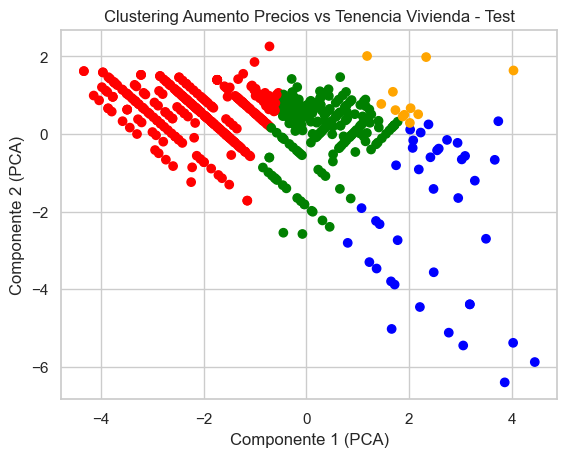

In [173]:
X_test_scaled = scaler.transform(test_df)
X_test_pca = pca.transform(X_test_scaled)

clusters_test = kmeans.predict(X_test_pca)

# Métrica de Silueta
silhouette_avg = silhouette_score(X_test_scaled, clusters_test)
print("Silhouette Score (Test):", silhouette_avg)

df_pca_test = pd.DataFrame(data=X_test_pca, columns=['Componente 1', 'Componente 2'])
df_pca_test['Cluster'] = clusters_test

color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}  # Asigna colores a cada cluster
colors = df_pca_test['Cluster'].map(color_map)  # Utiliza la columna 'Cluster' en lugar de 'Cluster Labels'

plt.scatter(df_pca_test['Componente 1'], df_pca_test['Componente 2'], c=colors)

plt.xlabel('Componente 1 (PCA)')
plt.ylabel('Componente 2 (PCA)')
plt.title('Clustering Aumento Precios vs Tenencia Vivienda - Test')

plt.show()


In [174]:
# Cálculo de la cantidad de registros en cada cluster
cluster_counts = df_pca_test['Cluster'].value_counts()

print("Cantidad de registros en cada cluster:")
print(cluster_counts)

# Cálculo la dispersión standart para cada cluster
cluster_std = df_pca_test.groupby('Cluster').std()

print("\nMedida de dispersión para cada cluster:")
print(cluster_std)

Cantidad de registros en cada cluster:
Cluster
0    351
2    229
1     39
3     11
Name: count, dtype: int64

Medida de dispersión para cada cluster:
         Componente 1  Componente 2
Cluster                            
0            0.931313      0.595982
1            0.875258      2.016232
2            0.609347      0.733416
3            0.735402      0.632792


In [175]:
# intento otra medida de calculo la inercia para cada cluster
cluster_inertias = []
for cluster_label in set(clusters_test):
    cluster_data = df_pca_test[df_pca_test['Cluster'] == cluster_label]
    cluster_centroid = cluster_data[['Componente 1', 'Componente 2']].mean()
    distances = np.linalg.norm(cluster_data[['Componente 1', 'Componente 2']] - cluster_centroid, axis=1)
    cluster_inertia = np.sum(distances)
    cluster_inertias.append(cluster_inertia)

# Imprimo la inercia para cada cluster
for i, inertia in enumerate(cluster_inertias):
    print("Inercia para el Cluster", i+1, ":", inertia)

Inercia para el Cluster 1 : 345.02303567911144
Inercia para el Cluster 2 : 78.46509451200237
Inercia para el Cluster 3 : 187.51457497680616
Inercia para el Cluster 4 : 8.416874535702759


↑↑↑ <small>Un valor más bajo de inercia indica que las muestras dentro de un cluster están más cerca entre sí y más alejadas de las muestras de otros clusters.</small>

↑↑↑ <small>Coeficiente de Calinski-Harabasz: <br>
Es una medida de calidad del agrupamiento, es decir, que tan separados o compactos están los grupos en comparación con otros.<br>
Cuanto mayor sea el coeficiente mejor será la calidad del agrupamiento.<br>
He intentado con este otro indicador para ver otra óptica del problema
<small>

#### MODELO DE REGRESIÓN

<small>Dado un determinado nivel de ingreso declarado de los hogares (ht11) y la calidad de ahorro (eg_ahorro) quiero ver si se puede predecir el nivel de aumento de precio que se dió (secc_Categ) en esa seccion censal
</small>

<small>Separo un sección de test cargado desde el Excel <br>
Esta información vendría a ser parte de lo explicado arriba. En este caso son datos reales de otra sección censal
</small> ↓↓↓ 

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Error cuadrático medio (MSE): 0.7561770936182899
Coeficiente de determinación (R²): -0.003067721976312221
Predicciones: [ 1.20345538e-01  6.86008102e-02  1.49080054e-01  1.07928944e-01
  8.62992514e-02  7.77760012e-02 -2.83325274e-01  2.50326371e-02
 -2.68551029e-02  3.31709222e-02  8.90402454e-02 -3.82397308e-02
 -5.90075443e-05  6.66623896e-02  2.75927119e-02  6.22686362e-02
  7.00720870e-02  8.51356382e-02  8.53113556e-02 -2.53967464e-02
  9.35527232e-02 -2.43316773e-02 -8.63294897e-02  5.54123265e-02
  1.84209997e-02 -9.29330426e-02  2.02738455e-02  1.06479670e-01
  8.64591634e-02  6.60381393e-02  9.73434323e-02  6.72110919e-02
  7.19933315e-02  6.19492181e-02 -4.75028915e-03  4.94862477e-02
 -5.80464395e-03  2.08183530e-02 -4.39028150e-02  6.65825445e-03
  1.23576565e-01 -1.70333424e-01 -1.54499823e-01 -6.52300584e-03
 -4.56675712e-02  4.55340901e-02  1.09178500e-01]


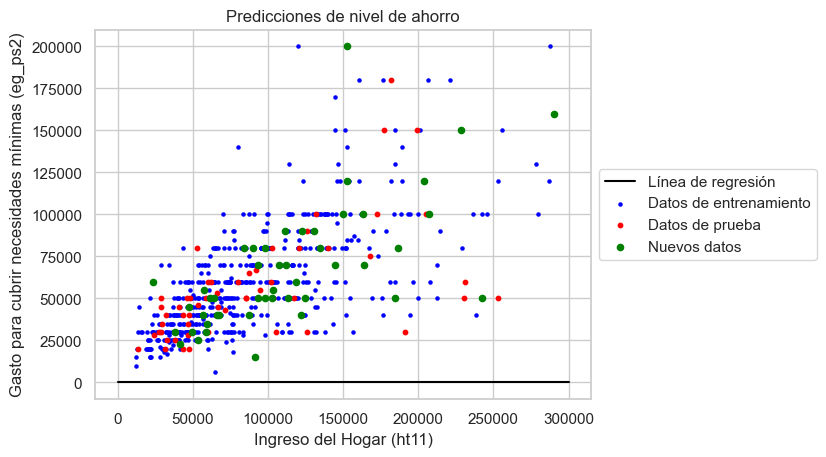

In [177]:

# Filtrar y seleccionar columnas relevantes
df_EncuestaH_p6R = df_EncuestaH_p2b.dropna(subset=['ht11'])
df_EncuestaH_p6R = df_EncuestaH_p6R[(df_EncuestaH_p6R['eg_ps2'] > 1000) & (df_EncuestaH_p6R['eg_ps2'] < 200001) & (df_EncuestaH_p6R['ht11'] < 300000)]
df_EncuestaH_p6R = df_EncuestaH_p6R[df_EncuestaH_p6R['test'] == 0].drop('test', axis=1)

# Dividir los datos en características (X) y variable objetivo (y)
X = df_EncuestaH_p6R[['ht11', 'eg_ps2']]
y = df_EncuestaH_p6R['secc_Categ']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coef.de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R²):', r2)

# Creo datos de "prueba" con sección censal "testigo"
df_EncuestaH_p6T = df_EncuestaH_p2[[ 'secc_Categ', 'eg_ps2', 'ht11', 'test']] 
df_EncuestaH_p6T = df_EncuestaH_p6T[(df_EncuestaH_p6T['eg_ps2'] > 1000) & (df_EncuestaH_p6T['eg_ps2'] < 200001) & (df_EncuestaH_p6T['ht11'] < 300000)] 
df_EncuestaH_p6T = df_EncuestaH_p6T[df_EncuestaH_p6T['test'] == 1] # No test
df_EncuestaH_p6T = df_EncuestaH_p6T.drop('test', axis=1)
datos_nuevos = {
    'ht11': df_EncuestaH_p6T['ht11'].tolist(),
    'eg_ps2': df_EncuestaH_p6T['eg_ps2'].tolist()
}
df_NuevosDatos = pd.DataFrame(datos_nuevos)

# Realizo predicciones en los nuevos datos de prueba
v_predic = model.predict(df_NuevosDatos)
print('Predicciones:', v_predic)

# Calcular la línea de regresión
x_line = np.linspace(0, 300000, 100)  # 100 valores aleatoreos de 0 a 300.000
#y_line = model.predict(pd.DataFrame({'ht11': x_line}))
y_line = model.predict(pd.DataFrame({'ht11': x_line, 'eg_ps2': np.mean(X_train['eg_ps2'])}))


# Agregar la línea de regresión al gráfico
plt.plot(x_line, y_line, color='black', label='Línea de regresión')

# Gráfico de dispersión de los datos de entrenamiento, prueba y nuevos datos
plt.scatter(X_train['ht11'], X_train['eg_ps2'], c='blue', label='Datos de entrenamiento', s=5)
plt.scatter(X_test['ht11'], X_test['eg_ps2'], c='red', label='Datos de prueba', s=10)
plt.scatter(df_NuevosDatos['ht11'], df_NuevosDatos['eg_ps2'], c='green', label='Nuevos datos', s=20)
plt.xlabel('Ingreso del Hogar (ht11)')
plt.ylabel('Gasto para cubrir necesidades mínimas (eg_ps2)')
plt.title('Predicciones de nivel de ahorro')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [178]:
print(np.mean(X_train['eg_ps2']))

57845.26112185686


↑↑↑ <small>La línea horizontal puede indicar que la correlación entre las variables elegidas (eg_ps2, ht11 y secc_Categ) sea muy baja
<small>

#### Modelo de Clasificación <br>
<small>Intento con un modelo de clasificación para constatar si es más apropiado o no </small>

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Filtro y seleccionar columnas relevantes, excluyo outlier muy alejados
df_EncuestaH_p6R = df_EncuestaH_p2b.dropna(subset=['ht11'])
df_EncuestaH_p6R = df_EncuestaH_p6R[(df_EncuestaH_p6R['eg_ps2'] > 1000) & (df_EncuestaH_p6R['eg_ps2'] < 200001) & (df_EncuestaH_p6R['ht11'] < 300000)]
df_EncuestaH_p6R = df_EncuestaH_p6R[df_EncuestaH_p6R['test'] == 0].drop('test', axis=1)

X = df_EncuestaH_p6R[['ht11', 'eg_ps2']]
y = df_EncuestaH_p6R['secc_Categ']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entreno el modelo de clasificación logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Realizo predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Pruebo métricas:
# Calculo la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión:', accuracy)

# Calculo la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(confusion_mat)

# Datos de prueba
df_EncuestaH_p6T = df_EncuestaH_p2b[['secc_Categ', 'eg_ps2', 'ht11', 'test']]
df_EncuestaH_p6T = df_EncuestaH_p6T[(df_EncuestaH_p6T['eg_ps2'] > 1000) & (df_EncuestaH_p6T['eg_ps2'] < 200001) & (df_EncuestaH_p6T['ht11'] < 300000)]
df_EncuestaH_p6T = df_EncuestaH_p6T[df_EncuestaH_p6T['test'] == 1].drop('test', axis=1)

# Realizo predicciones en los datos de prueba, sección censal seleccionada
new_X = df_EncuestaH_p6T[['ht11', 'eg_ps2']]
new_pred = model.predict(new_X)
print('Predicciones para nuevos datos:')
print(new_pred)


Precisión: 0.39655172413793105
Matriz de confusión:
[[ 9  0 15]
 [ 7  0  7]
 [ 6  0 14]]
Predicciones para nuevos datos:
[1. 1. 1. 1.]


↑↑↑ <small>Conclusiones: <br>
La precisión del modelo es 0.3965, lo que significa que el modelo ha clasificado correctamente aproximadamente el 39.65% de los casos en el conjunto de datos de prueba. <br> <br>

Matriz de confusión: muestra los resultados de la clasificación realizada por el modelo. <br>
Está representada por una matriz de 3x3, ya que hay tres clases posibles de 'secc_Categ' (bajo, medio, alto): -1, 0 y 1.

Entonces, interpreto por lo que obtuve:<br>
> La primera fila de la matriz indica la clase real -1. El modelo predijo correctamente 9 casos como -1 (verdaderos negativos), no clasificó ningún caso correctamente como 0 (falsos positivos) y clasificó incorrectamente 15 casos como 1 (falsos negativos). <br>
> La segunda fila representa la clase real 0. El modelo no clasificó correctamente ningún caso como 0 (falsos negativos) y clasificó incorrectamente 7 casos como 1 (falsos positivos). No se clasificó ningún caso correctamente como -1.<br>
>La tercera fila corresponde a la clase real 1. El modelo clasificó incorrectamente 6 casos como -1 (falsos positivos), no clasificó ningún caso correctamente como 0 (falsos negativos) y clasificó correctamente 14 casos como 1 (verdaderos positivos).<br>
Resumiendo, el modelo tuvo un mejor rendimiento al predecir la clase -1 (verdaderos negativos, incremento bajo de precios) en comparación con las clases 0 y 1. Interpreto que el modelo tuvo dificultades para distinguir entre las clases 0 y 1 (valor moderado y alto de incremento de precios).<br>
Esto podría cambiar si mapeo nuevas zonas y enriquezco el modelo con más información de secciones sensales
<small>

#### Arbol de Decisión <br>
<small>A continuación aplico un Arbol de Decisión y para evaluarlo aplico una Matriz de Confusión

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Igual a regresión: características y variable objetivo
X = df_EncuestaH_p6R[['ht11', 'eg_ps2']]
y = df_EncuestaH_p6R['secc_Categ']

# Divido los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  # fijo un 10%

# Creo el modelo de Árbol de Decisión
model = DecisionTreeClassifier()

# Entreno el modelo
model.fit(X_train, y_train)

# Realizo predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calculo la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion_mtx)

values_ht11 = df_EncuestaH_p6T['ht11'].tolist()
values_eg_ps2 = df_EncuestaH_p6T['eg_ps2'].tolist()


# Realizar predicciones en nuevos datos
df_NuevosDatos = pd.DataFrame({'ht11': values_ht11, 'eg_ps2': values_eg_ps2})

new_predictions = model.predict(df_NuevosDatos)
print("Predicciones para nuevos datos:")
print(new_predictions)


Precisión: 0.39655172413793105
Matriz de confusión:
[[11  2 11]
 [ 5  4  5]
 [ 8  4  8]]
Predicciones para nuevos datos:
[ 0. -1.  1.  1.]


In [181]:
df_EncuestaH_p6T

,secc_Categ,eg_ps2,ht11
574,1,50000,98189.48
2520,1,70000,107554.20
8360,1,160000,290076.57
8361,1,150000,228435.44


↑↑↑ <small>Conclusiones: <br>
El modelo ha clasificado correctamente aproximadamente el 40% de los casos en el conjunto de datos de prueba. <br>

Matriz de confusión: idem descripción anterior <br>

Al parecer los resultados son bajos.<br>
Al imprimir el dataframe de los datos de prueba veo que hay [1,1,1,1] y las predicciones son [0,-1,1,1]. Un 50% en línea con el indicador de precisión cercano al 40%. <br>
(ver descripción de la variable 'eg_ahorro') <br>

Observación que vale para el caso anterior: Puede ser que el modelo tenga un sesgo al incorporar datos de prueba de una sección censal distinta y sea mejor aplicarlo para cada sección sensal por separado porque lo que vale para una puede no valer para otra. Esto lo intentaré probar mas adelante.<br>
Pero el modelo de predicción que me propuse buscar intentaba buscar a nivel país o por lo menos departamental ("Provincia"). Con los resultados obtenidos por ahora podría indicar que necesite enriquecer el modelo con más información.
<small>

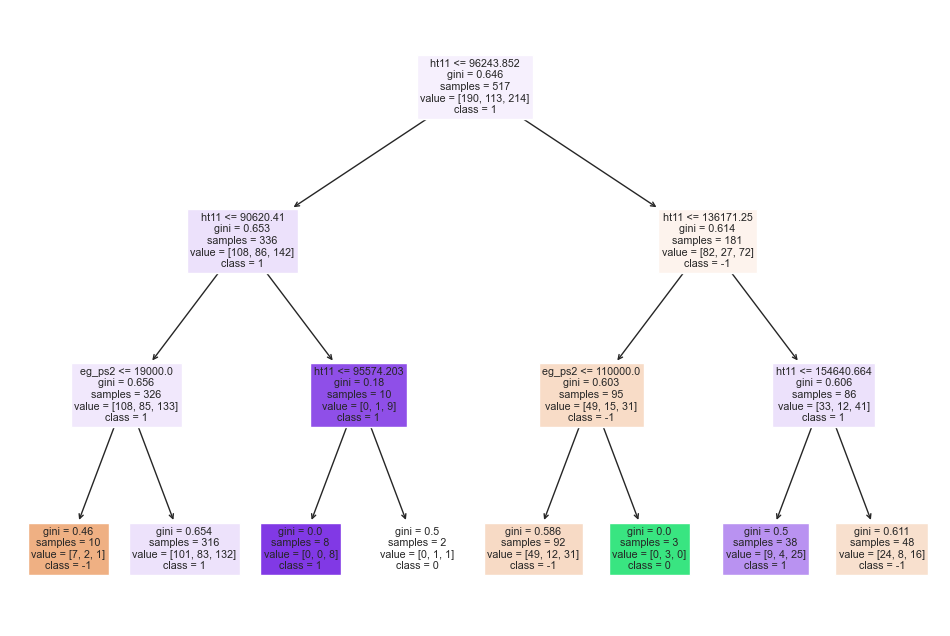

In [182]:
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['ht11', 'eg_ps2'], class_names=['-1', '0', '1'], filled=True)
plt.show()